# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

#### Basic imports

In [17]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [18]:
base_df = pd.DataFrame()

clean_data_folder = "train_data"

for filename in os.listdir(clean_data_folder):
    full_path = f"{clean_data_folder}/{filename}"
    
    if "Falling" not in full_path:
    # load data into a DataFrame
        print(full_path)
        new_df = pd.read_csv(full_path)
    
        # merge into the base DataFrame
        base_df = pd.concat([base_df, new_df])

train_data/Resepck_s1714206_Climbing_stairs.csv
train_data/Resepck_s1714206_Descending_stairs.csv
train_data/Resepck_s1714206_Desk_work.csv
train_data/Resepck_s1714206_Lying down left.csv
train_data/Resepck_s1714206_Lying_down_on_back.csv
train_data/Resepck_s1714206_Lying_down_on_stomach.csv
train_data/Resepck_s1714206_Lying_down_right.csv
train_data/Resepck_s1714206_Movement.csv
train_data/Resepck_s1714206_Running.csv
train_data/Resepck_s1714206_Sitting.csv
train_data/Resepck_s1714206_Sitting_bent_backwards.csv
train_data/Resepck_s1714206_Sitting_bent_forward.csv
train_data/Resepck_s1714206_Walking.csv
train_data/Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
train_data/Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
train_data/Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
train_data/Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
train_data/Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
train_data/Respeck_s1541031_Lying down on stomach_

train_data/Respeck_s1724279_Desk work_06-10-2021_12-34-21.csv
train_data/Respeck_s1724279_Lying down left_30-09-2021_12-36-48.csv
train_data/Respeck_s1724279_Lying down on back_30-09-2021_12-35-42.csv
train_data/Respeck_s1724279_Lying down on stomach_30-09-2021_12-38-59.csv
train_data/Respeck_s1724279_Lying down right_30-09-2021_12-37-51.csv
train_data/Respeck_s1724279_Movement_30-09-2021_12-44-55.csv
train_data/Respeck_s1724279_Running_30-09-2021_12-40-35.csv
train_data/Respeck_s1724279_Sitting bent backward_30-09-2021_12-34-01.csv
train_data/Respeck_s1724279_Sitting bent forward_30-09-2021_12-33-17.csv
train_data/Respeck_s1724279_Sitting_29-09-2021_12-47-37.csv
train_data/Respeck_s1724279_Standing_30-09-2021_12-34-44.csv
train_data/Respeck_s1724279_Walking at normal speed_30-09-2021_12-39-50.csv
train_data/Respeck_s1727780_Climbing stairs_29-09-2021_21-30-21.csv
train_data/Respeck_s1727780_Descending stairs_29-09-2021_21-31-11.csv
train_data/Respeck_s1727780_Desk work_29-09-2021_21-4

train_data/Respeck_s1809887_Sitting bent backward_27-09-2022_14-56-45.csv
train_data/Respeck_s1809887_Sitting bent forward_27-09-2022_14-55-20.csv
train_data/Respeck_s1809887_Sitting_27-09-2022_14-48-42.csv
train_data/Respeck_s1809887_Standing_27-09-2022_14-51-10.csv
train_data/Respeck_s1809887_Walking at normal speed_27-09-2022_15-39-52.csv
train_data/Respeck_s1810150_Climbing stairs_22-09-2022_19-35-27.csv
train_data/Respeck_s1810150_Descending stairs_22-09-2022_19-49-57.csv
train_data/Respeck_s1810150_Desk work_06-10-2022_20-41-46.csv
train_data/Respeck_s1810150_Lying down left_22-09-2022_11-45-09.csv
train_data/Respeck_s1810150_Lying down on back_22-09-2022_11-44-14.csv
train_data/Respeck_s1810150_Lying down on stomach_22-09-2022_11-46-54.csv
train_data/Respeck_s1810150_Lying down right_22-09-2022_11-46-01.csv
train_data/Respeck_s1810150_Movement_06-10-2022_20-27-45.csv
train_data/Respeck_s1810150_Running_22-09-2022_14-06-03.csv
train_data/Respeck_s1810150_Sitting bent backward_22-

train_data/Respeck_s1826377_Lying down right_28-09-2022_22-22-54.csv
train_data/Respeck_s1826377_Movement_28-09-2022_22-37-31.csv
train_data/Respeck_s1826377_Running_28-09-2022_23-03-32.csv
train_data/Respeck_s1826377_Sitting bent backward_28-09-2022_22-13-25.csv
train_data/Respeck_s1826377_Sitting bent forward_28-09-2022_22-08-54.csv
train_data/Respeck_s1826377_Sitting_28-09-2022_22-06-13.csv
train_data/Respeck_s1826377_Standing_28-09-2022_22-15-15.csv
train_data/Respeck_s1826377_Walking at normal speed_28-09-2022_22-58-25.csv
train_data/Respeck_s1826390_Climbing stairs_07-10-2021_20-37-39.csv
train_data/Respeck_s1826390_Descending stairs_07-10-2021_20-36-21.csv
train_data/Respeck_s1826390_Desk work_07-10-2021_18-48-35.csv
train_data/Respeck_s1826390_Lying down left_07-10-2021_01-39-23.csv
train_data/Respeck_s1826390_Lying down on back_07-10-2021_01-34-01.csv
train_data/Respeck_s1826390_Lying down on stomach_07-10-2021_02-07-31.csv
train_data/Respeck_s1826390_Lying down right_07-10-20

train_data/Respeck_s1842093_Running_05-10-2021_18-27-04.csv
train_data/Respeck_s1842093_Sitting bent backward_05-10-2021_18-06-23.csv
train_data/Respeck_s1842093_Sitting bent forward_05-10-2021_18-04-37.csv
train_data/Respeck_s1842093_Sitting_05-10-2021_18-02-19.csv
train_data/Respeck_s1842093_Standing_05-10-2021_18-09-13.csv
train_data/Respeck_s1842093_Walking at normal speed_05-10-2021_18-26-14.csv
train_data/Respeck_s1842855_Climbing stairs_04-10-2022_17-03-32.csv
train_data/Respeck_s1842855_Descending stairs_04-10-2022_17-04-23.csv
train_data/Respeck_s1842855_Desk work_04-10-2022_00-02-30.csv
train_data/Respeck_s1842855_Lying down left_03-10-2022_23-56-47.csv
train_data/Respeck_s1842855_Lying down on back_03-10-2022_23-55-46.csv
train_data/Respeck_s1842855_Lying down on stomach_03-10-2022_23-59-57.csv
train_data/Respeck_s1842855_Lying down right_03-10-2022_23-58-54.csv
train_data/Respeck_s1842855_Movement_04-10-2022_00-05-19.csv
train_data/Respeck_s1842855_Running_04-10-2022_00-13-

train_data/Respeck_s1863792_Lying down on stomach_23-09-2022_15-37-42.csv
train_data/Respeck_s1863792_Lying down right_23-09-2022_15-36-02.csv
train_data/Respeck_s1863792_Movement_23-09-2022_15-53-04.csv
train_data/Respeck_s1863792_Running_23-09-2022_17-09-20.csv
train_data/Respeck_s1863792_Sitting bent backward_23-09-2022_15-28-43.csv
train_data/Respeck_s1863792_Sitting bent forward_23-09-2022_15-27-38.csv
train_data/Respeck_s1863792_Sitting_30-09-2022_16-06-38.csv
train_data/Respeck_s1863792_Standing_30-09-2022_16-07-41.csv
train_data/Respeck_s1863792_Walking at normal speed_23-09-2022_15-42-20.csv
train_data/Respeck_s1864705_Climbing stairs_06-10-2021_22-56-52.csv
train_data/Respeck_s1864705_Descending stairs_06-10-2021_22-57-35.csv
train_data/Respeck_s1864705_Desk work_06-10-2021_23-02-53.csv
train_data/Respeck_s1864705_Lying down left_06-10-2021_23-00-13.csv
train_data/Respeck_s1864705_Lying down on back_29-09-2021_20-51-06.csv
train_data/Respeck_s1864705_Lying down on stomach_29-

train_data/Respeck_s1893835_Lying down right_29-09-2021_10-58-20.csv
train_data/Respeck_s1893835_Movement_29-09-2021_11-14-07.csv
train_data/Respeck_s1893835_Sitting bent backward_29-09-2021_10-55-04.csv
train_data/Respeck_s1893835_Sitting bent forward_29-09-2021_10-42-44.csv
train_data/Respeck_s1893835_Sitting_29-09-2021_10-53-30.csv
train_data/Respeck_s1893835_Standing_29-09-2021_10-55-53.csv
train_data/Respeck_s1894401_Climbing stairs_01-10-2021_11-44-38.csv
train_data/Respeck_s1894401_Descending stairs_01-10-2021_11-45-35.csv
train_data/Respeck_s1894401_Desk work_06-10-2021_10-33-19.csv
train_data/Respeck_s1894401_Lying down left_01-10-2021_12-03-57.csv
train_data/Respeck_s1894401_Lying down on back_01-10-2021_12-03-03.csv
train_data/Respeck_s1894401_Lying down on stomach_01-10-2021_12-01-26.csv
train_data/Respeck_s1894401_Lying down right_01-10-2021_12-02-13.csv
train_data/Respeck_s1894401_Movement_01-10-2021_12-00-20.csv
train_data/Respeck_s1894401_Running_01-10-2021_12-26-11.csv

train_data/Respeck_s1911455_Movement_23-09-2022_17-24-15.csv
train_data/Respeck_s1911455_Running_23-09-2022_17-34-41.csv
train_data/Respeck_s1911455_Sitting bent backward_23-09-2022_17-18-20.csv
train_data/Respeck_s1911455_Sitting bent forward_23-09-2022_17-18-58.csv
train_data/Respeck_s1911455_Sitting_23-09-2022_17-16-52.csv
train_data/Respeck_s1911455_Standing_23-09-2022_17-19-41.csv
train_data/Respeck_s1911455_Walking at normal speed_04-10-2022_15-14-50.csv
train_data/Respeck_s1912575_Climbing stairs_01-10-2022_02-20-46.csv
train_data/Respeck_s1912575_Descending stairs_01-10-2022_02-21-34.csv
train_data/Respeck_s1912575_Desk work_28-09-2022_22-07-05.csv
train_data/Respeck_s1912575_Lying down left_28-09-2022_22-04-22.csv
train_data/Respeck_s1912575_Lying down on back_28-09-2022_21-44-25.csv
train_data/Respeck_s1912575_Lying down on stomach_28-09-2022_22-05-58.csv
train_data/Respeck_s1912575_Lying down right_28-09-2022_22-05-10.csv
train_data/Respeck_s1912575_Movement_04-10-2022_23-20

train_data/Respeck_s1923493_Sitting bent backward_02-10-2022_15-57-00.csv
train_data/Respeck_s1923493_Sitting bent forward_02-10-2022_12-42-43.csv
train_data/Respeck_s1923493_Sitting_02-10-2022_12-39-58.csv
train_data/Respeck_s1923493_Standing_02-10-2022_12-52-25.csv
train_data/Respeck_s1923493_Walking at normal speed_02-10-2022_13-11-05.csv
train_data/Respeck_s1925695_Climbing stairs_28-09-2022_15-41-22.csv
train_data/Respeck_s1925695_Descending stairs_28-09-2022_15-42-28.csv
train_data/Respeck_s1925695_Desk work_28-09-2022_16-00-36.csv
train_data/Respeck_s1925695_Lying down left_28-09-2022_15-37-26.csv
train_data/Respeck_s1925695_Lying down on back_28-09-2022_15-33-35.csv
train_data/Respeck_s1925695_Lying down on stomach_28-09-2022_15-36-36.csv
train_data/Respeck_s1925695_Lying down right_28-09-2022_15-34-20.csv
train_data/Respeck_s1925695_Movement_28-09-2022_15-58-02.csv
train_data/Respeck_s1925695_Running_28-09-2022_15-52-31.csv
train_data/Respeck_s1925695_Sitting bent backward_28-

train_data/Respeck_s1948094_Lying down right_23-09-2022_11-56-22.csv
train_data/Respeck_s1948094_Movement_23-09-2022_12-58-07.csv
train_data/Respeck_s1948094_Running_23-09-2022_12-54-29.csv
train_data/Respeck_s1948094_Sitting bent backward_23-09-2022_11-50-08.csv
train_data/Respeck_s1948094_Sitting bent forward_23-09-2022_11-48-20.csv
train_data/Respeck_s1948094_Sitting_23-09-2022_11-45-44.csv
train_data/Respeck_s1948094_Standing_23-09-2022_11-51-34.csv
train_data/Respeck_s1948094_Walking at normal speed_23-09-2022_12-49-50.csv
train_data/Respeck_s1951693_Climbing stairs_05-10-2022_16-29-06.csv
train_data/Respeck_s1951693_Descending stairs_05-10-2022_16-30-17.csv
train_data/Respeck_s1951693_Desk work_23-09-2022_16-44-08.csv
train_data/Respeck_s1951693_Lying down left_23-09-2022_16-36-03.csv
train_data/Respeck_s1951693_Lying down on back_23-09-2022_16-40-05.csv
train_data/Respeck_s1951693_Lying down on stomach_23-09-2022_16-38-45.csv
train_data/Respeck_s1951693_Lying down right_30-09-20

train_data/Respeck_s1965695_Lying down on back_29-09-2022_13-32-30.csv
train_data/Respeck_s1965695_Lying down on stomach_29-09-2022_13-37-53.csv
train_data/Respeck_s1965695_Lying down right_29-09-2022_13-35-36.csv
train_data/Respeck_s1965695_Movement_29-09-2022_13-40-59.csv
train_data/Respeck_s1965695_Running_04-10-2022_19-39-27.csv
train_data/Respeck_s1965695_Sitting bent backward_29-09-2022_13-28-11.csv
train_data/Respeck_s1965695_Sitting bent forward_29-09-2022_13-27-15.csv
train_data/Respeck_s1965695_Sitting_04-10-2022_21-58-10.csv
train_data/Respeck_s1965695_Standing_29-09-2022_13-30-19.csv
train_data/Respeck_s1965695_Walking at normal speed_04-10-2022_19-37-04.csv
train_data/Respeck_s1967087_Climbing stairs_02-10-2022_16-37-10.csv
train_data/Respeck_s1967087_Descending stairs_02-10-2022_16-30-31.csv
train_data/Respeck_s1967087_Desk work_02-10-2022_15-20-19.csv
train_data/Respeck_s1967087_Lying down left_02-10-2022_15-03-09.csv
train_data/Respeck_s1967087_Lying down on back_02-10-

train_data/Respeck_s1992413_Lying down on back_05-10-2022_00-42-59.csv
train_data/Respeck_s1992413_Lying down on stomach_05-10-2022_10-40-11.csv
train_data/Respeck_s1992413_Lying down right_05-10-2022_00-20-45.csv
train_data/Respeck_s1992413_Movement_28-09-2022_11-03-13.csv
train_data/Respeck_s1992413_Running_28-09-2022_11-42-37.csv
train_data/Respeck_s1992413_Sitting bent backward_28-09-2022_10-52-46.csv
train_data/Respeck_s1992413_Sitting bent forward_29-09-2022_18-09-22.csv
train_data/Respeck_s1992413_Sitting_28-09-2022_10-50-46.csv
train_data/Respeck_s1992413_Standing_28-09-2022_10-54-08.csv
train_data/Respeck_s1992413_Walking at normal speed_29-09-2022_18-49-58.csv
train_data/Respeck_s1996403_Climbing stairs_02-10-2022_15-33-36.csv
train_data/Respeck_s1996403_Descending stairs_02-10-2022_15-34-33.csv
train_data/Respeck_s1996403_Desk work_02-10-2022_18-09-36.csv
train_data/Respeck_s1996403_Lying down left_02-10-2022_15-12-16.csv
train_data/Respeck_s1996403_Lying down on back_02-10-

train_data/Respeck_s2192970_Descending stairs_29-09-2021_21-39-49.csv
train_data/Respeck_s2192970_Desk work_29-09-2021_20-24-25.csv
train_data/Respeck_s2192970_Lying down left_29-09-2021_20-26-47.csv
train_data/Respeck_s2192970_Lying down on back_29-09-2021_20-26-05.csv
train_data/Respeck_s2192970_Lying down on stomach_29-09-2021_20-28-13.csv
train_data/Respeck_s2192970_Lying down right_29-09-2021_20-27-26.csv
train_data/Respeck_s2192970_Movement_29-09-2021_21-36-55.csv
train_data/Respeck_s2192970_Running_29-09-2021_21-36-11.csv
train_data/Respeck_s2192970_Sitting bent backward_07-10-2021_21-47-57.csv
train_data/Respeck_s2192970_Sitting bent forward_07-10-2021_21-47-11.csv
train_data/Respeck_s2192970_Sitting_07-10-2021_21-46-27.csv
train_data/Respeck_s2192970_Standing_06-10-2021_22-42-05.csv
train_data/Respeck_s2192970_Walking at normal speed_29-09-2021_21-35-23.csv
train_data/Respeck_s2211162_Climbing stairs_28-09-2021_11-21-15.csv
train_data/Respeck_s2211162_Descending stairs_28-09-2

train_data/Respeck_s2299270_Desk work_03-10-2022_17-28-14.csv
train_data/Respeck_s2299270_Lying down left_03-10-2022_16-00-31.csv
train_data/Respeck_s2299270_Lying down on back_03-10-2022_15-59-43.csv
train_data/Respeck_s2299270_Lying down on stomach_03-10-2022_16-04-09.csv
train_data/Respeck_s2299270_Lying down right_03-10-2022_16-02-21.csv
train_data/Respeck_s2299270_Movement_03-10-2022_17-24-56.csv
train_data/Respeck_s2299270_Running_30-09-2022_17-00-24.csv
train_data/Respeck_s2299270_Sitting bent backward_03-10-2022_15-56-25.csv
train_data/Respeck_s2299270_Sitting bent forward_03-10-2022_15-54-41.csv
train_data/Respeck_s2299270_Sitting_03-10-2022_12-06-19.csv
train_data/Respeck_s2299270_Standing_03-10-2022_11-08-12.csv
train_data/Respeck_s2299270_Walking at normal speed_03-10-2022_16-53-10.csv
train_data/Respeck_s2303353_Climbing stairs_22-09-2022_14-32-51.csv
train_data/Respeck_s2303353_Descending stairs_22-09-2022_14-34-06.csv
train_data/Respeck_s2303353_Desk work_22-09-2022_14-2

train_data/Thingy_s1706154_Walking at normal speed_29-09-2021_13-41-56.csv
train_data/Thingy_s1711661_Climbing stairs_23-09-2021_21-01-08.csv
train_data/Thingy_s1711661_Descending stairs_23-09-2021_21-00-17.csv
train_data/Thingy_s1711661_Desk work_23-09-2021_21-10-19.csv
train_data/Thingy_s1711661_Lying down left_23-09-2021_20-11-06.csv
train_data/Thingy_s1711661_Lying down on back_23-09-2021_20-08-09.csv
train_data/Thingy_s1711661_Lying down on stomach_23-09-2021_20-16-07.csv
train_data/Thingy_s1711661_Lying down right_23-09-2021_20-13-32.csv
train_data/Thingy_s1711661_Movement_23-09-2021_21-11-35.csv
train_data/Thingy_s1711661_Running_23-09-2021_20-45-32.csv
train_data/Thingy_s1711661_Sitting bent backward_23-09-2021_19-57-28.csv
train_data/Thingy_s1711661_Sitting bent forward_23-09-2021_19-54-57.csv
train_data/Thingy_s1711661_Sitting_23-09-2021_19-52-42.csv
train_data/Thingy_s1711661_Standing_23-09-2021_19-59-54.csv
train_data/Thingy_s1711661_Walking at normal speed_23-09-2021_20-25

train_data/Thingy_s1757177_Descending stairs_06-10-2021_16-35-09.csv
train_data/Thingy_s1757177_Desk work_02-10-2021_13-48-52.csv
train_data/Thingy_s1757177_Lying down left_06-10-2021_20-35-46.csv
train_data/Thingy_s1757177_Lying down on back_06-10-2021_20-36-51.csv
train_data/Thingy_s1757177_Lying down on stomach_02-10-2021_20-00-15.csv
train_data/Thingy_s1757177_Lying down right_02-10-2021_19-59-23.csv
train_data/Thingy_s1757177_Movement_06-10-2021_16-45-06.csv
train_data/Thingy_s1757177_Running_02-10-2021_14-07-50.csv
train_data/Thingy_s1757177_Sitting bent backward_06-10-2021_16-39-14.csv
train_data/Thingy_s1757177_Sitting bent forward_06-10-2021_18-35-01.csv
train_data/Thingy_s1757177_Sitting_02-10-2021_13-39-40.csv
train_data/Thingy_s1757177_Standing_02-10-2021_13-45-17.csv
train_data/Thingy_s1757177_Walking at normal speed_02-10-2021_14-02-04.csv
train_data/Thingy_s1761322_Climbing stairs_06-10-2021_11-53-08.csv
train_data/Thingy_s1761322_Descending stairs_06-10-2021_11-54-07.cs

train_data/Thingy_s1817455_Standing_29-09-2021_14-27-26.csv
train_data/Thingy_s1817455_Walking at normal speed_29-09-2021_14-55-03.csv
train_data/Thingy_s1817967_Climbing stairs_30-09-2022_17-09-17.csv
train_data/Thingy_s1817967_Descending stairs_30-09-2022_17-09-55.csv
train_data/Thingy_s1817967_Desk work_30-09-2022_17-11-38.csv
train_data/Thingy_s1817967_Lying down left_30-09-2022_17-03-05.csv
train_data/Thingy_s1817967_Lying down on back_30-09-2022_17-02-13.csv
train_data/Thingy_s1817967_Lying down on stomach_30-09-2022_17-04-32.csv
train_data/Thingy_s1817967_Lying down right_30-09-2022_17-03-52.csv
train_data/Thingy_s1817967_Movement_30-09-2022_17-08-05.csv
train_data/Thingy_s1817967_Running_30-09-2022_17-07-14.csv
train_data/Thingy_s1817967_Sitting_30-09-2022_16-59-26.csv
train_data/Thingy_s1817967_Sitting bent backward_30-09-2022_17-01-08.csv
train_data/Thingy_s1817967_Sitting bent forward_30-09-2022_17-00-04.csv
train_data/Thingy_s1817967_Standing_30-09-2022_17-16-31.csv
train_d

train_data/Thingy_s1832512_Sitting bent forward_07-10-2022_10-29-33.csv
train_data/Thingy_s1832512_Sitting_02-10-2022_15-25-34.csv
train_data/Thingy_s1832512_Standing_05-10-2022_11-23-45.csv
train_data/Thingy_s1832512_Walking at normal speed_07-10-2022_11-27-12.csv
train_data/Thingy_s1834237_Climbing stairs_30-09-2022_17-54-34.csv
train_data/Thingy_s1834237_Descending stairs_30-09-2022_17-55-23.csv
train_data/Thingy_s1834237_Desk work_30-09-2022_17-51-25.csv
train_data/Thingy_s1834237_Lying down left_30-09-2022_17-15-26.csv
train_data/Thingy_s1834237_Lying down on back_30-09-2022_17-10-14.csv
train_data/Thingy_s1834237_Lying down on stomach_30-09-2022_17-16-56.csv
train_data/Thingy_s1834237_Lying down right_30-09-2022_17-11-19.csv
train_data/Thingy_s1834237_Movement_30-09-2022_18-00-09.csv
train_data/Thingy_s1834237_Running_30-09-2022_17-43-00.csv
train_data/Thingy_s1834237_Sitting bent backward_30-09-2022_17-00-14.csv
train_data/Thingy_s1834237_Sitting bent forward_30-09-2022_16-57-34

train_data/Thingy_s1850642_Lying down right_29-09-2021_13-20-04.csv
train_data/Thingy_s1850642_Movement_29-09-2021_13-27-54.csv
train_data/Thingy_s1850642_Sitting bent backward_29-09-2021_13-16-26.csv
train_data/Thingy_s1850642_Sitting bent forward_29-09-2021_13-15-41.csv
train_data/Thingy_s1850642_Sitting_29-09-2021_12-49-46.csv
train_data/Thingy_s1850642_Standing_29-09-2021_13-17-14.csv
train_data/Thingy_s1850642_Walking at normal speed_29-09-2021_13-22-31.csv
train_data/Thingy_s1852056_Climbing stairs_05-10-2022_14-36-59.csv
train_data/Thingy_s1852056_Descending stairs_05-10-2022_14-38-20.csv
train_data/Thingy_s1852056_Desk work_05-10-2022_15-04-41.csv
train_data/Thingy_s1852056_Lying down left_05-10-2022_15-15-29.csv
train_data/Thingy_s1852056_Lying down on back_05-10-2022_15-12-55.csv
train_data/Thingy_s1852056_Lying down on stomach_05-10-2022_15-14-29.csv
train_data/Thingy_s1852056_Lying down right_05-10-2022_15-18-00.csv
train_data/Thingy_s1852056_Movement_05-10-2022_15-09-22.cs

train_data/Thingy_s1865890_Lying down on stomach_07-10-2021_00-48-11.csv
train_data/Thingy_s1865890_Lying down right_07-10-2021_20-12-04.csv
train_data/Thingy_s1865890_Movement_07-10-2021_00-40-22.csv
train_data/Thingy_s1865890_Running_07-10-2021_09-20-56.csv
train_data/Thingy_s1865890_Sitting bent backward_07-10-2021_00-35-45.csv
train_data/Thingy_s1865890_Sitting bent forward_07-10-2021_00-34-28.csv
train_data/Thingy_s1865890_Sitting_07-10-2021_20-09-57.csv
train_data/Thingy_s1865890_Standing_07-10-2021_00-36-52.csv
train_data/Thingy_s1865890_Walking at normal speed_07-10-2021_09-19-52.csv
train_data/Thingy_s1870467_Climbing stairs_06-10-2021_11-26-05.csv
train_data/Thingy_s1870467_Descending stairs_06-10-2021_11-26-56.csv
train_data/Thingy_s1870467_Desk work_29-09-2021_11-50-15.csv
train_data/Thingy_s1870467_Lying down left_29-09-2021_11-47-22.csv
train_data/Thingy_s1870467_Lying down on back_29-09-2021_11-46-33.csv
train_data/Thingy_s1870467_Lying down on stomach_29-09-2021_11-49-0

train_data/Thingy_s1901843_Lying down on back_24-09-2022_16-45-33.csv
train_data/Thingy_s1901843_Lying down on stomach_24-09-2022_16-47-52.csv
train_data/Thingy_s1901843_Lying down right_24-09-2022_16-47-08.csv
train_data/Thingy_s1901843_Movement_24-09-2022_16-42-42.csv
train_data/Thingy_s1901843_Running_24-09-2022_16-40-18.csv
train_data/Thingy_s1901843_Sitting bent backward_24-09-2022_16-37-04.csv
train_data/Thingy_s1901843_Sitting bent forward_24-09-2022_16-36-22.csv
train_data/Thingy_s1901843_Sitting_24-09-2022_16-35-39.csv
train_data/Thingy_s1901843_Standing_24-09-2022_16-37-53.csv
train_data/Thingy_s1901843_Walking at normal speed_24-09-2022_16-39-22.csv
train_data/Thingy_s1904845_Climbing stairs_05-10-2022_19-17-14.csv
train_data/Thingy_s1904845_Descending stairs_05-10-2022_19-16-29.csv
train_data/Thingy_s1904845_Desk work_05-10-2022_19-24-42.csv
train_data/Thingy_s1904845_Lying down left_05-10-2022_18-57-03.csv
train_data/Thingy_s1904845_Lying down on back_05-10-2022_18-54-42.c

train_data/Thingy_s1915425_Descending stairs_28-09-2022_14-03-05.csv
train_data/Thingy_s1915425_Desk work_28-09-2022_12-31-34.csv
train_data/Thingy_s1915425_Lying down left_28-09-2022_12-22-29.csv
train_data/Thingy_s1915425_Lying down on back_28-09-2022_12-20-39.csv
train_data/Thingy_s1915425_Lying down on stomach_28-09-2022_12-25-03.csv
train_data/Thingy_s1915425_Lying down right_28-09-2022_12-23-47.csv
train_data/Thingy_s1915425_Movement_28-09-2022_12-32-52.csv
train_data/Thingy_s1915425_Running_28-09-2022_14-30-07.csv
train_data/Thingy_s1915425_Sitting bent backward_28-09-2022_12-29-46.csv
train_data/Thingy_s1915425_Sitting bent forward_28-09-2022_12-28-00.csv
train_data/Thingy_s1915425_Sitting_28-09-2022_18-50-36.csv
train_data/Thingy_s1915425_Standing_28-09-2022_14-28-46.csv
train_data/Thingy_s1915425_Walking at normal speed_28-09-2022_14-31-25.csv
train_data/Thingy_s1918258_Climbing stairs_29-09-2022_18-03-40.csv
train_data/Thingy_s1918258_Descending stairs_29-09-2022_18-03-00.cs

train_data/Thingy_s1925709_Standing_02-10-2022_21-53-58.csv
train_data/Thingy_s1925709_Walking at normal speed_03-10-2022_22-12-37.csv
train_data/Thingy_s1925715_Climbing stairs_28-09-2022_13-59-02.csv
train_data/Thingy_s1925715_Descending stairs_28-09-2022_13-59-51.csv
train_data/Thingy_s1925715_Desk work_27-09-2022_11-55-10.csv
train_data/Thingy_s1925715_Lying down left_28-09-2022_16-59-32.csv
train_data/Thingy_s1925715_Lying down on back_28-09-2022_12-09-16.csv
train_data/Thingy_s1925715_Lying down on stomach_28-09-2022_12-16-22.csv
train_data/Thingy_s1925715_Lying down right_28-09-2022_12-15-06.csv
train_data/Thingy_s1925715_Movement_27-09-2022_11-56-37.csv
train_data/Thingy_s1925715_Running_28-09-2022_14-25-04.csv
train_data/Thingy_s1925715_Sitting bent backward_27-09-2022_11-52-14.csv
train_data/Thingy_s1925715_Sitting bent forward_27-09-2022_11-50-35.csv
train_data/Thingy_s1925715_Sitting_27-09-2022_11-49-17.csv
train_data/Thingy_s1925715_Standing_27-09-2022_11-53-35.csv
train_d

train_data/Thingy_s1951735_Sitting bent backward_03-10-2022_00-47-39.csv
train_data/Thingy_s1951735_Sitting bent forward_03-10-2022_00-42-39.csv
train_data/Thingy_s1951735_Sitting_03-10-2022_00-41-21.csv
train_data/Thingy_s1951735_Standing_03-10-2022_00-58-09.csv
train_data/Thingy_s1951735_Walking at normal speed_03-10-2022_14-47-58.csv
train_data/Thingy_s1956488_Climbing stairs_30-09-2022_15-37-36.csv
train_data/Thingy_s1956488_Descending stairs_30-09-2022_15-38-26.csv
train_data/Thingy_s1956488_Desk work_30-09-2022_15-34-56.csv
train_data/Thingy_s1956488_Lying down left_30-09-2022_15-32-01.csv
train_data/Thingy_s1956488_Lying down on back_30-09-2022_15-30-08.csv
train_data/Thingy_s1956488_Lying down on stomach_30-09-2022_15-32-48.csv
train_data/Thingy_s1956488_Lying down right_30-09-2022_15-31-06.csv
train_data/Thingy_s1956488_Movement_30-09-2022_15-36-04.csv
train_data/Thingy_s1956488_Running_05-10-2022_10-20-36.csv
train_data/Thingy_s1956488_Sitting bent backward_30-09-2022_15-25-4

train_data/Thingy_s1967984_Running_06-10-2022_14-46-05.csv
train_data/Thingy_s1967984_Sitting bent backward_24-09-2022_16-14-05.csv
train_data/Thingy_s1967984_Sitting bent forward_24-09-2022_16-13-05.csv
train_data/Thingy_s1967984_Sitting_03-10-2022_21-08-29.csv
train_data/Thingy_s1967984_Standing_24-09-2022_16-14-47.csv
train_data/Thingy_s1967984_Walking at normal speed_24-09-2022_16-22-47.csv
train_data/Thingy_s1970333_Climbing stairs_13-10-2021_23-35-47.csv
train_data/Thingy_s1970333_Descending stairs_13-10-2021_23-36-28.csv
train_data/Thingy_s1970333_Desk work_15-10-2021_02-30-14.csv
train_data/Thingy_s1970333_Lying down left_13-10-2021_21-33-10.csv
train_data/Thingy_s1970333_Lying down on back_13-10-2021_21-36-19.csv
train_data/Thingy_s1970333_Lying down on stomach_13-10-2021_21-40-53.csv
train_data/Thingy_s1970333_Lying down right_13-10-2021_21-37-27.csv
train_data/Thingy_s1970333_Movement_13-10-2021_21-55-05.csv
train_data/Thingy_s1970333_Running_13-10-2021_22-15-18.csv
train_da

train_data/Thingy_s1998909_Lying down right_03-10-2022_16-20-25.csv
train_data/Thingy_s1998909_Movement_03-10-2022_16-43-21.csv
train_data/Thingy_s1998909_Running_03-10-2022_16-35-31.csv
train_data/Thingy_s1998909_Sitting bent backward_03-10-2022_16-07-33.csv
train_data/Thingy_s1998909_Sitting bent forward_03-10-2022_16-05-01.csv
train_data/Thingy_s1998909_Sitting_03-10-2022_16-03-03.csv
train_data/Thingy_s1998909_Standing_03-10-2022_16-11-19.csv
train_data/Thingy_s1998909_Walking at normal speed_03-10-2022_16-32-54.csv
train_data/Thingy_s2119637_Climbing stairs_03-10-2021_23-40-48.csv
train_data/Thingy_s2119637_Descending stairs_03-10-2021_23-37-19.csv
train_data/Thingy_s2119637_Desk work_03-10-2021_23-22-43.csv
train_data/Thingy_s2119637_Lying down left_03-10-2021_23-17-46.csv
train_data/Thingy_s2119637_Lying down on back_03-10-2021_23-21-36.csv
train_data/Thingy_s2119637_Lying down on stomach_03-10-2021_23-19-46.csv
train_data/Thingy_s2119637_Lying down right_03-10-2021_23-18-46.csv

train_data/Thingy_s2211228_Lying down on back_29-09-2021_16-42-54.csv
train_data/Thingy_s2211228_Running_29-09-2021_17-27-55.csv
train_data/Thingy_s2211228_Lying down on stomach_29-09-2021_16-40-44.csv
train_data/Thingy_s2211228_Lying down right_06-10-2021_23-57-33.csv
train_data/Thingy_s2211228_Movement_06-10-2021_19-49-31.csv
train_data/Thingy_s2211228_Sitting bent backward_29-09-2021_16-44-48.csv
train_data/Thingy_s2211228_Sitting bent forward_29-09-2021_16-45-26.csv
train_data/Thingy_s2211228_Sitting_29-09-2021_16-46-08.csv
train_data/Thingy_s2211228_Standing_06-10-2021_19-41-21.csv
train_data/Thingy_s2211228_Walking at normal speed_06-10-2021_19-48-08.csv
train_data/Thingy_s2212045_Climbing stairs_29-09-2021_13-37-28.csv
train_data/Thingy_s2212045_Descending stairs_29-09-2021_13-36-47.csv
train_data/Thingy_s2212045_Desk work_29-09-2021_11-59-56.csv
train_data/Thingy_s2212045_Lying down left_29-09-2021_11-57-39.csv
train_data/Thingy_s2212045_Lying down on back_29-09-2021_11-56-56.c

train_data/Thingy_s2303866_Descending stairs_29-09-2022_13-14-18.csv
train_data/Thingy_s2303866_Desk work_29-09-2022_13-06-20.csv
train_data/Thingy_s2303866_Lying down left_29-09-2022_12-57-44.csv
train_data/Thingy_s2303866_Lying down on back_29-09-2022_12-56-52.csv
train_data/Thingy_s2303866_Lying down on stomach_29-09-2022_13-00-44.csv
train_data/Thingy_s2303866_Lying down right_29-09-2022_12-59-58.csv
train_data/Thingy_s2303866_Movement_29-09-2022_13-20-19.csv
train_data/Thingy_s2303866_Running_29-09-2022_13-24-27.csv
train_data/Thingy_s2303866_Sitting bent backward_29-09-2022_12-50-27.csv
train_data/Thingy_s2303866_Sitting bent forward_29-09-2022_12-48-41.csv
train_data/Thingy_s2303866_Sitting_29-09-2022_12-46-56.csv
train_data/Thingy_s2303866_Standing_29-09-2022_12-54-56.csv
train_data/Thingy_s2303866_Walking at normal speed_29-09-2022_13-03-34.csv
train_data/Thingy_s2308859_Climbing stairs_05-10-2022_13-00-00.csv
train_data/Thingy_s2308859_Descending stairs_05-10-2022_12-55-02.cs

In [19]:
len(base_df)

2608100

Reset the index of the base DataFrame.

In [20]:
base_df.reset_index(drop=True, inplace=True)
base_df

Unnamed: 0     timestamp   accel_x   accel_y   accel_z      gyro_x  \
0               0.0  1.633613e+12 -0.020996 -0.946594  0.250427   10.500000   
1               1.0  1.633613e+12 -0.009277 -0.957336  0.206238   10.375000   
2               2.0  1.633613e+12  0.044678 -1.119202  0.314880    7.312500   
3               3.0  1.633613e+12 -0.075684 -1.090149  0.212341    2.343750   
4               4.0  1.633613e+12  0.039307 -1.237854  0.263611   -1.296875   
...             ...           ...       ...       ...       ...         ...   
2608095         NaN  1.664892e+12 -0.866211 -0.039062  0.042969    4.687500   
2608096         NaN  1.664892e+12 -0.341797  0.122070 -0.123047   79.500000   
2608097         NaN  1.664892e+12  0.120117  0.081055  0.121094  127.000000   
2608098         NaN  1.664892e+12 -0.139648  0.122070  0.294922   97.750000   
2608099         NaN  1.664892e+12 -0.136719  0.063477  0.600586   54.500000   

             gyro_y     gyro_z sensor_type            activity_type  \
0        -11.968750   2.156250     Respeck          Climbing stairs   
1        -13.750000  -0.921875     Respeck          Climbing stairs   
2        -11.890625  -0.781250     Respeck          Climbing stairs   
3         -7.593750  -3.625000     Respeck          Climbing stairs   
4         -2.890625 -10.875000     Respeck          Climbing stairs   
...             ...        ...         ...                      ...   
2608095 -114.625000 -62.468750      Thingy  Walking at normal speed   
2608096  -86.875000 -64.906250      Thingy  Walking at normal speed   
2608097  -72.343750 -53.906250      Thingy  Walking at normal speed   
2608098   30.312500 -17.656250      Thingy  Walking at normal speed   
2608099  144.218750   7.625000      Thingy  Walking at normal speed   

         activity_code subject_id notes  Unnamed: 0.1  \
0                   12   s1714206   NaN           NaN   
1                   12   s1714206   NaN           NaN   
2                   12   s1714206   NaN           NaN   
3                   12   s1714206   NaN           NaN   
4                   12   s1714206   NaN           NaN   
...                ...        ...   ...           ...   
2608095              1   s2342658   NaN           NaN   
2608096              1   s2342658   NaN           NaN   
2608097              1   s2342658   NaN           NaN   
2608098              1   s2342658   NaN           NaN   
2608099              1   s2342658   NaN           NaN   

                                              recording_id  mag_x  mag_y  \
0                                                      NaN    NaN    NaN   
1                                                      NaN    NaN    NaN   
2                                                      NaN    NaN    NaN   
3                                                      NaN    NaN    NaN   
4                                                      NaN    NaN    NaN   
...                                                    ...    ...    ...   
2608095  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   
2608096  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   
2608097  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   
2608098  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   
2608099  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   

         mag_z  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
2608095    0.0  
2608096    0.0  
2608097    0.0  
2608098    0.0  
2608099    0.0  

[2608100 rows x 18 columns]

Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [21]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing'
 'Falling on knees']
The number of unique recordings is: 3551
The subject IDs in the recordings are: 123


In [22]:
base_df =  base_df[base_df["activity_type"] != "Falling on knees"]
base_df = base_df[base_df["accel_x"].notna()]
base_df = base_df[base_df["accel_y"].notna()]
base_df = base_df[base_df["accel_z"].notna()]

In [23]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing']
The number of unique recordings is: 3527
The subject IDs in the recordings are: 123


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

### Sliding windows with Pandas 

Pandas conveniently offers built-in functions that help us create the sliding window data very easily.

In [24]:
example_recording = base_df[base_df.activity_code == 1]

# confim we only have one recording here
len(example_recording.recording_id.unique())

273

In [25]:
window_size = 100 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [26]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size] 

In [27]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [28]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [29]:
final_sliding_windows

Unnamed: 0     timestamp   accel_x   accel_y   accel_z      gyro_x  \
0              0.0  1.633611e+12 -0.125488 -1.024719  0.306335  -18.734375   
1              1.0  1.633611e+12 -0.163330 -0.914856  0.314636  -11.234375   
2              2.0  1.633611e+12 -0.250977 -0.731262  0.199158    1.609375   
3              3.0  1.633611e+12 -0.042480 -1.002991  0.102966   11.937500   
4              4.0  1.633611e+12 -0.036865 -1.185120  0.248718   17.734375   
...            ...           ...       ...       ...       ...         ...   
775895         NaN  1.664892e+12 -0.947266 -0.502930  0.306641 -144.500000   
775896         NaN  1.664892e+12 -0.368164  0.274414 -0.315430  -70.156250   
775897         NaN  1.664892e+12 -1.006836  0.089844  0.111328   33.562500   
775898         NaN  1.664892e+12 -1.050781 -0.230469  0.184570  -44.281250   
775899         NaN  1.664892e+12 -1.029297  0.078125  0.215820  -18.500000   

            gyro_y     gyro_z sensor_type            activity_type  \
0       -36.468750   0.812500     Respeck  Walking at normal speed   
1       -35.312500   1.781250     Respeck  Walking at normal speed   
2       -29.296875   0.562500     Respeck  Walking at normal speed   
3       -16.218750  -7.562500     Respeck  Walking at normal speed   
4       -38.484375 -13.296875     Respeck  Walking at normal speed   
...            ...        ...         ...                      ...   
775895   77.812500   2.375000      Thingy  Walking at normal speed   
775896  125.656250 -12.468750      Thingy  Walking at normal speed   
775897  111.125000  31.125000      Thingy  Walking at normal speed   
775898   94.156250  54.843750      Thingy  Walking at normal speed   
775899   50.812500  52.843750      Thingy  Walking at normal speed   

        activity_code subject_id notes  Unnamed: 0.1  \
0                   1   s1714206   NaN           NaN   
1                   1   s1714206   NaN           NaN   
2                   1   s1714206   NaN           NaN   
3                   1   s1714206   NaN           NaN   
4                   1   s1714206   NaN           NaN   
...               ...        ...   ...           ...   
775895              1   s2342658   NaN           NaN   
775896              1   s2342658   NaN           NaN   
775897              1   s2342658   NaN           NaN   
775898              1   s2342658   NaN           NaN   
775899              1   s2342658   NaN           NaN   

                                             recording_id  mag_x  mag_y  \
0                                                     NaN    NaN    NaN   
1                                                     NaN    NaN    NaN   
2                                                     NaN    NaN    NaN   
3                                                     NaN    NaN    NaN   
4                                                     NaN    NaN    NaN   
...                                                   ...    ...    ...   
775895  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   
775896  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   
775897  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   
775898  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   
775899  Thingy_s2342658_Walking at normal speed_04-10-...    0.0    0.0   

        mag_z  window_id  
0         NaN          0  
1         NaN          0  
2         NaN          0  
3         NaN          0  
4         NaN          0  
...       ...        ...  
775895    0.0       7758  
775896    0.0       7758  
775897    0.0       7758  
775898    0.0       7758  
775899    0.0       7758  

[775900 rows x 19 columns]

You can plot each window to see the signals. Here we will plot the first four windows of the walking activity.

In [30]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

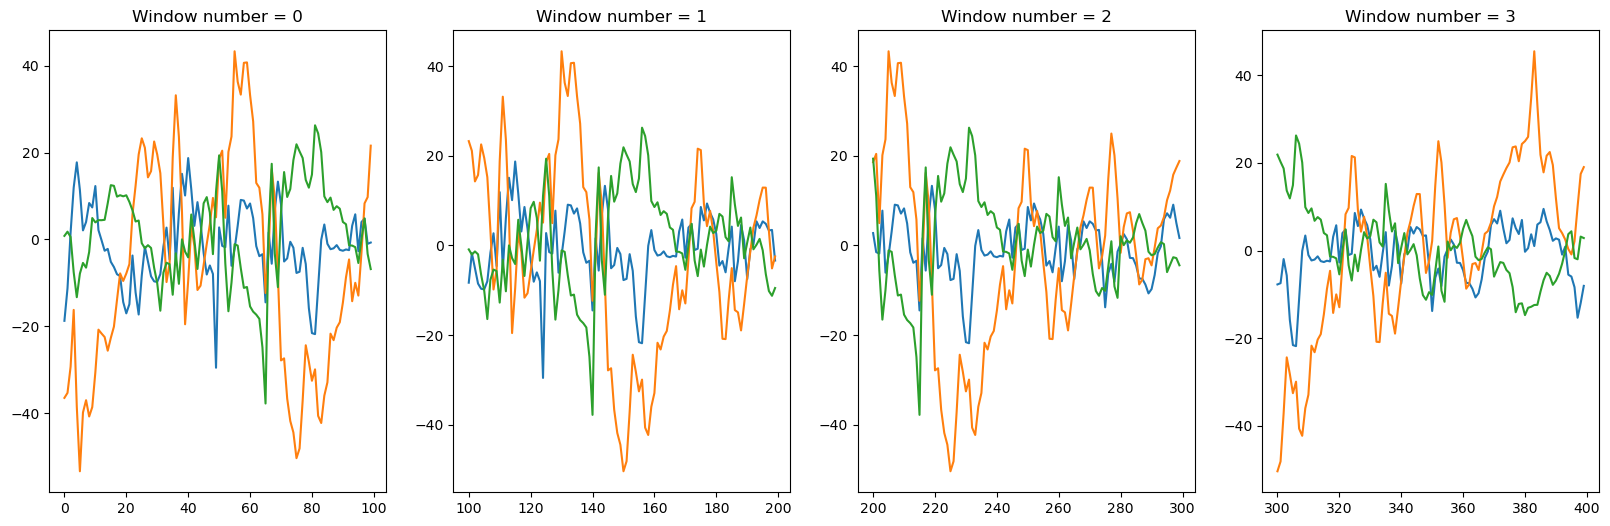

In [31]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")


It's also interesting to observe the dimensionality of one window. Considering just the accelerometer and gyroscope signals, with all three axes, the resulting dimensionality of one window is:

In [32]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [33]:
np.array(first_four_windows[0][columns_of_interest]).shape

(100, 6)

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

One quick and simple method to consider for HAR is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). It can take a multi-dimensional datapoint as input and can output a classification. 

We can transform each window of data into one single, multidimensional datapoint by applying simple computations using the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html) package.

In [34]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|███████████████████████| 15/15 [00:00<00:00, 16.99it/s]


accel_x__sum_values  accel_x__median  accel_x__mean  accel_x__length  \
0              -11.738281        -0.120728      -0.117383            100.0   
1               -8.173096        -0.052490      -0.081731            100.0   
2               -7.534912        -0.067627      -0.075349            100.0   
3               -9.499512        -0.098877      -0.094995            100.0   
4              -11.850342        -0.124023      -0.118503            100.0   
...                   ...              ...            ...              ...   
7754           -93.809571        -1.041016      -0.938096            100.0   
7755           -94.779297        -1.052246      -0.947793            100.0   
7756           -95.936524        -1.060547      -0.959365            100.0   
7757           -94.777344        -1.058105      -0.947773            100.0   
7758           -95.780273        -1.060547      -0.957803            100.0   

      accel_x__standard_deviation  accel_x__variance  \
0                        0.150666           0.022700   
1                        0.151127           0.022839   
2                        0.131318           0.017244   
3                        0.132184           0.017473   
4                        0.126285           0.015948   
...                           ...                ...   
7754                     0.620367           0.384856   
7755                     0.620852           0.385458   
7756                     0.601359           0.361633   
7757                     0.598579           0.358297   
7758                     0.601803           0.362166   

      accel_x__root_mean_square  accel_x__maximum  accel_x__minimum  \
0                      0.190995          0.177979         -0.492920   
1                      0.171812          0.254883         -0.492920   
2                      0.151400          0.254883         -0.449219   
3                      0.162778          0.254883         -0.449219   
4                      0.173179          0.254883         -0.449219   
...                         ...               ...               ...   
7754                   1.124668          0.724609         -2.000000   
7755                   1.133035          0.724609         -2.000000   
7756                   1.132261          0.181641         -2.000000   
7757                   1.120969          0.324219         -2.000000   
7758                   1.131173          0.552734         -2.000000   

      accel_y__sum_values  ...  gyro_y__minimum  gyro_z__sum_values  \
0              -98.237549  ...       -53.359375          137.046875   
1              -97.781494  ...       -50.343750           78.484375   
2              -97.058838  ...       -50.343750          104.484375   
3              -97.354004  ...       -50.343750           44.109375   
4              -97.120605  ...       -20.875000         -550.781250   
...                   ...  ...              ...                 ...   
7754            13.854492  ...      -208.687500        -1056.125000   
7755            13.886719  ...      -208.687500        -1039.656250   
7756            13.807617  ...      -208.687500         -882.375000   
7757            14.304688  ...      -206.375000         -842.750000   
7758            13.892578  ...      -206.375000         -930.125000   

      gyro_z__median  gyro_z__mean  gyro_z__length  \
0           0.789062      1.370469           100.0   
1           0.015625      0.784844           100.0   
2           0.640625      1.044844           100.0   
3           0.046875      0.441094           100.0   
4          -4.703125     -5.507812           100.0   
...              ...           ...             ...   
7754       -4.468750    -10.561250           100.0   
7755      -12.343750    -10.396562           100.0   
7756      -10.421875     -8.823750           100.0   
7757       -3.250000     -8.427500           100.0   
7758       -5.203125     -9.301250           100.0   

      gyro_z__standard_deviation  gyro_z_

Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [35]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df[base_df["sensor_type"].str.contains("Thingy")].groupby("sensor_type"):
    print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = Thingy


In [36]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [37]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|███████████████████████| 15/15 [00:05<00:00,  2.63it/s]


accel_x__sum_values  accel_x__median  accel_x__mean  accel_x__length  \
0               -34.715576        -0.694336      -0.694312             50.0   
1               -34.652100        -0.693481      -0.693042             50.0   
2               -34.660889        -0.693359      -0.693218             50.0   
3               -34.688232        -0.693604      -0.693765             50.0   
4               -34.723877        -0.694336      -0.694478             50.0   
...                    ...              ...            ...              ...   
51557           -47.034180        -1.042969      -0.940684             50.0   
51558           -48.360352        -1.071777      -0.967207             50.0   
51559           -48.715820        -1.060547      -0.974316             50.0   
51560           -46.743164        -1.057129      -0.934863             50.0   
51561           -46.190430        -1.063477      -0.923809             50.0   

       accel_x__standard_deviation  accel_x__variance  \
0                         0.003353           0.000011   
1                         0.003297           0.000011   
2                         0.003351           0.000011   
3                         0.003380           0.000011   
4                         0.003908           0.000015   
...                            ...                ...   
51557                     0.631445           0.398723   
51558                     0.634802           0.402974   
51559                     0.561460           0.315238   
51560                     0.552245           0.304974   
51561                     0.622826           0.387912   

       accel_x__root_mean_square  accel_x__maximum  accel_x__minimum  \
0                       0.694320         -0.687012         -0.700684   
1                       0.693050         -0.685547         -0.702881   
2                       0.693226         -0.685547         -0.702881   
3                       0.693773         -0.685547         -0.700195   
4                       0.694489         -0.685547         -0.704102   
...                          ...               ...               ...   
51557                   1.132964          0.181641         -2.000000   
51558                   1.156920          0.181641         -2.000000   
51559                   1.124513          0.142578         -2.000000   
51560                   1.085792          0.324219         -2.000000   
51561                   1.114152          0.552734         -2.000000   

       accel_y__sum_values  ...  gyro_y__minimum  gyro_z__sum_values  \
0               -23.480347  ...        -0.375000          -16.468750   
1               -23.434937  ...        -0.218750          -14.078125   
2               -23.473022  ...        -0.203125          -15.484375   
3               -23.527954  ...        -0.421875          -18.875000   
4               -23.518433  ...        -0.421875          -19.468750   
...                    ...  ...              ...                 ...   
51557             6.737305  ...      -206.375000         -471.656250   
51558             7.142578  ...      -206.375000         -380.750000   
51559             7.478516  ...      -203.750000         -367.968750   
51560             6.416992  ...      -200.093750         -486.781250   
51561             6.297852  ...      -200.093750         -528.218750   

       gyro_z__median  gyro_z__mean  gyro_z__length  \
0           -0.343750     -0.329375            50.0   
1           -0.289062     -0.281562            50.0   
2           -0.335938     -0.309688            50.0   
3           -0.375000     -0.377500            50.0   
4           -0.375000     -0.389375            50.0   
...               ...           ...             ...   
51557       -2.515625     -9.433125            50.0   
51558       -5.781250     -7.615000            50.0   
51559       -8.500000     -7.359375            50.0   
51560       -2.546875     -9.735625            50.0   
51561       -1.718750    -10.564375   

Now we also extract the classes from each window

In [38]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

activity_type
window_id                         
0                  Lying down left
1                  Lying down left
2                  Lying down left
3                  Lying down left
4                  Lying down left
...                            ...
51557      Walking at normal speed
51558      Walking at normal speed
51559      Walking at normal speed
51560      Walking at normal speed
51561      Walking at normal speed

[51562 rows x 1 columns]

We need to assign a number to each categorical class for the Random Forest Classifer. It is mainly up to you how you categorise your classes. In this example, we will use the labels:
- 0 for Desk work
- 1 for Walking at normal speed

Bear in mind that your classification task will be multi-class, not binary. 

In [39]:
class_labels = {
    'Desk work': 0,
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on back': 6,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Sitting bent backward': 11,
    'Sitting bent forward': 12,
    'Standing': 13  
}

In [40]:
window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels

activity_type
window_id               
0                      4
1                      4
2                      4
3                      4
4                      4
...                  ...
51557                  1
51558                  1
51559                  1
51560                  1
51561                  1

[51562 rows x 1 columns]

In [41]:
base_df["recording_id"].unique()

array([nan, 'Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43',
       'Respeck_s1541031_Descending stairs_06-10-2021_11-25-05', ...,
       'Thingy_s2342658_Sitting_04-10-2022_14-17-29',
       'Thingy_s2342658_Standing_04-10-2022_14-22-37',
       'Thingy_s2342658_Walking at normal speed_04-10-2022_14-53-43'],
      dtype=object)

### Quickly training a Random Forest Classifier

We now have all the tools to start training a Random Forest Classifier. We will use the feature_list as inputs and window_id_class_labels as outputs. We will do a basic 80/20 split of the data for demonstration purposes. 

In your project you should split the data into training and tests sets by excluding entire subjects from the training set. This is discussed later on in this notebook.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.2, train_size=0.8)

In [43]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (41249, 54), y_train = (41249, 1)
Test set: X_test = (10313, 54), y_test = (10313, 1)


Now we can build and train the random forest classifier

In [44]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

/afs/inf.ed.ac.uk/user/s19/s1911455/miniconda3/envs/pdiot/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       716
           1       0.81      0.91      0.86       688
           2       0.84      0.85      0.85       835
           3       0.85      0.86      0.86       767
           4       0.98      0.96      0.97       751
           5       0.99      0.97      0.98       752
           6       0.97      0.99      0.98       734
           7       0.99      0.99      0.99       744
           8       0.81      0.73      0.77       750
           9       0.94      0.97      0.95       740
          10       0.94      0.95      0.94       727
          11       0.99      0.93      0.96       732
          12       0.98      0.96      0.97       655
          13       0.98      0.95      0.96       722

    accuracy                           0.92     10313
   macro avg       0.93      0.93      0.93     10313
weighted avg       0.92      0.92      0.92     10313



This is a very easy problem so the classifier learns very quickly. Your actual problem of classifying multiple activities will be much harder.

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [46]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 14

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            1216      
                                                                 
 batch_normalization (BatchN  (None, 48, 64)           256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 64)           256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 64)            0

2022-11-01 14:52:33.320055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-01 14:52:33.320515: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-01 14:52:33.320833: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nihiloor.inf.ed.ac.uk): /proc/driver/nvidia/version does not exist
2022-11-01 14:52:33.321216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


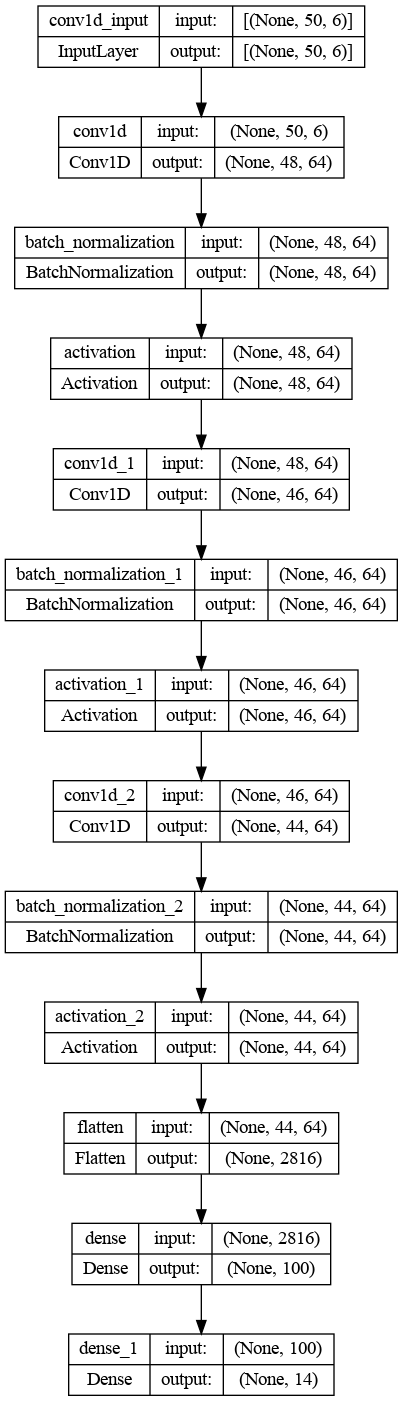

In [47]:
from keras.utils.vis_utils import plot_model
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [48]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [49]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

window_id = 0
shape = (50, 6)
window_id = 1
shape = (50, 6)
window_id = 2
shape = (50, 6)
window_id = 3
shape = (50, 6)
window_id = 4
shape = (50, 6)
window_id = 5
shape = (50, 6)
window_id = 6
shape = (50, 6)
window_id = 7
shape = (50, 6)
window_id = 8
shape = (50, 6)
window_id = 9
shape = (50, 6)
window_id = 10
shape = (50, 6)
window_id = 11
shape = (50, 6)
window_id = 12
shape = (50, 6)
window_id = 13
shape = (50, 6)
window_id = 14
shape = (50, 6)
window_id = 15
shape = (50, 6)
window_id = 16
shape = (50, 6)
window_id = 17
shape = (50, 6)
window_id = 18
shape = (50, 6)
window_id = 19
shape = (50, 6)
window_id = 20
shape = (50, 6)
window_id = 21
shape = (50, 6)
window_id = 22
shape = (50, 6)
window_id = 23
shape = (50, 6)
window_id = 24
shape = (50, 6)
window_id = 25
shape = (50, 6)
window_id = 26
shape = (50, 6)
window_id = 27
shape = (50, 6)
window_id = 28
shape = (50, 6)
window_id = 29
shape = (50, 6)
window_id = 30
shape = (50, 6)
window_id = 31
shape = (50, 6)
window_id = 32
sha

shape = (50, 6)
window_id = 1510
shape = (50, 6)
window_id = 1511
shape = (50, 6)
window_id = 1512
shape = (50, 6)
window_id = 1513
shape = (50, 6)
window_id = 1514
shape = (50, 6)
window_id = 1515
shape = (50, 6)
window_id = 1516
shape = (50, 6)
window_id = 1517
shape = (50, 6)
window_id = 1518
shape = (50, 6)
window_id = 1519
shape = (50, 6)
window_id = 1520
shape = (50, 6)
window_id = 1521
shape = (50, 6)
window_id = 1522
shape = (50, 6)
window_id = 1523
shape = (50, 6)
window_id = 1524
shape = (50, 6)
window_id = 1525
shape = (50, 6)
window_id = 1526
shape = (50, 6)
window_id = 1527
shape = (50, 6)
window_id = 1528
shape = (50, 6)
window_id = 1529
shape = (50, 6)
window_id = 1530
shape = (50, 6)
window_id = 1531
shape = (50, 6)
window_id = 1532
shape = (50, 6)
window_id = 1533
shape = (50, 6)
window_id = 1534
shape = (50, 6)
window_id = 1535
shape = (50, 6)
window_id = 1536
shape = (50, 6)
window_id = 1537
shape = (50, 6)
window_id = 1538
shape = (50, 6)
window_id = 1539
shape = (5

shape = (50, 6)
window_id = 1869
shape = (50, 6)
window_id = 1870
shape = (50, 6)
window_id = 1871
shape = (50, 6)
window_id = 1872
shape = (50, 6)
window_id = 1873
shape = (50, 6)
window_id = 1874
shape = (50, 6)
window_id = 1875
shape = (50, 6)
window_id = 1876
shape = (50, 6)
window_id = 1877
shape = (50, 6)
window_id = 1878
shape = (50, 6)
window_id = 1879
shape = (50, 6)
window_id = 1880
shape = (50, 6)
window_id = 1881
shape = (50, 6)
window_id = 1882
shape = (50, 6)
window_id = 1883
shape = (50, 6)
window_id = 1884
shape = (50, 6)
window_id = 1885
shape = (50, 6)
window_id = 1886
shape = (50, 6)
window_id = 1887
shape = (50, 6)
window_id = 1888
shape = (50, 6)
window_id = 1889
shape = (50, 6)
window_id = 1890
shape = (50, 6)
window_id = 1891
shape = (50, 6)
window_id = 1892
shape = (50, 6)
window_id = 1893
shape = (50, 6)
window_id = 1894
shape = (50, 6)
window_id = 1895
shape = (50, 6)
window_id = 1896
shape = (50, 6)
window_id = 1897
shape = (50, 6)
window_id = 1898
shape = (5

window_id = 2292
shape = (50, 6)
window_id = 2293
shape = (50, 6)
window_id = 2294
shape = (50, 6)
window_id = 2295
shape = (50, 6)
window_id = 2296
shape = (50, 6)
window_id = 2297
shape = (50, 6)
window_id = 2298
shape = (50, 6)
window_id = 2299
shape = (50, 6)
window_id = 2300
shape = (50, 6)
window_id = 2301
shape = (50, 6)
window_id = 2302
shape = (50, 6)
window_id = 2303
shape = (50, 6)
window_id = 2304
shape = (50, 6)
window_id = 2305
shape = (50, 6)
window_id = 2306
shape = (50, 6)
window_id = 2307
shape = (50, 6)
window_id = 2308
shape = (50, 6)
window_id = 2309
shape = (50, 6)
window_id = 2310
shape = (50, 6)
window_id = 2311
shape = (50, 6)
window_id = 2312
shape = (50, 6)
window_id = 2313
shape = (50, 6)
window_id = 2314
shape = (50, 6)
window_id = 2315
shape = (50, 6)
window_id = 2316
shape = (50, 6)
window_id = 2317
shape = (50, 6)
window_id = 2318
shape = (50, 6)
window_id = 2319
shape = (50, 6)
window_id = 2320
shape = (50, 6)
window_id = 2321
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 3129
shape = (50, 6)
window_id = 3130
shape = (50, 6)
window_id = 3131
shape = (50, 6)
window_id = 3132
shape = (50, 6)
window_id = 3133
shape = (50, 6)
window_id = 3134
shape = (50, 6)
window_id = 3135
shape = (50, 6)
window_id = 3136
shape = (50, 6)
window_id = 3137
shape = (50, 6)
window_id = 3138
shape = (50, 6)
window_id = 3139
shape = (50, 6)
window_id = 3140
shape = (50, 6)
window_id = 3141
shape = (50, 6)
window_id = 3142
shape = (50, 6)
window_id = 3143
shape = (50, 6)
window_id = 3144
shape = (50, 6)
window_id = 3145
shape = (50, 6)
window_id = 3146
shape = (50, 6)
window_id = 3147
shape = (50, 6)
window_id = 3148
shape = (50, 6)
window_id = 3149
shape = (50, 6)
window_id = 3150
shape = (50, 6)
window_id = 3151
shape = (50, 6)
window_id = 3152
shape = (50, 6)
window_id = 3153
shape = (50, 6)
window_id = 3154
shape = (50, 6)
window_id = 3155
shape = (50, 6)
window_id = 3156
shape = (50, 6)
window_id = 3157
shape = (50, 6)
window_id = 3158
shape = (5

shape = (50, 6)
window_id = 3849
shape = (50, 6)
window_id = 3850
shape = (50, 6)
window_id = 3851
shape = (50, 6)
window_id = 3852
shape = (50, 6)
window_id = 3853
shape = (50, 6)
window_id = 3854
shape = (50, 6)
window_id = 3855
shape = (50, 6)
window_id = 3856
shape = (50, 6)
window_id = 3857
shape = (50, 6)
window_id = 3858
shape = (50, 6)
window_id = 3859
shape = (50, 6)
window_id = 3860
shape = (50, 6)
window_id = 3861
shape = (50, 6)
window_id = 3862
shape = (50, 6)
window_id = 3863
shape = (50, 6)
window_id = 3864
shape = (50, 6)
window_id = 3865
shape = (50, 6)
window_id = 3866
shape = (50, 6)
window_id = 3867
shape = (50, 6)
window_id = 3868
shape = (50, 6)
window_id = 3869
shape = (50, 6)
window_id = 3870
shape = (50, 6)
window_id = 3871
shape = (50, 6)
window_id = 3872
shape = (50, 6)
window_id = 3873
shape = (50, 6)
window_id = 3874
shape = (50, 6)
window_id = 3875
shape = (50, 6)
window_id = 3876
shape = (50, 6)
window_id = 3877
shape = (50, 6)
window_id = 3878
shape = (5

shape = (50, 6)
window_id = 4322
shape = (50, 6)
window_id = 4323
shape = (50, 6)
window_id = 4324
shape = (50, 6)
window_id = 4325
shape = (50, 6)
window_id = 4326
shape = (50, 6)
window_id = 4327
shape = (50, 6)
window_id = 4328
shape = (50, 6)
window_id = 4329
shape = (50, 6)
window_id = 4330
shape = (50, 6)
window_id = 4331
shape = (50, 6)
window_id = 4332
shape = (50, 6)
window_id = 4333
shape = (50, 6)
window_id = 4334
shape = (50, 6)
window_id = 4335
shape = (50, 6)
window_id = 4336
shape = (50, 6)
window_id = 4337
shape = (50, 6)
window_id = 4338
shape = (50, 6)
window_id = 4339
shape = (50, 6)
window_id = 4340
shape = (50, 6)
window_id = 4341
shape = (50, 6)
window_id = 4342
shape = (50, 6)
window_id = 4343
shape = (50, 6)
window_id = 4344
shape = (50, 6)
window_id = 4345
shape = (50, 6)
window_id = 4346
shape = (50, 6)
window_id = 4347
shape = (50, 6)
window_id = 4348
shape = (50, 6)
window_id = 4349
shape = (50, 6)
window_id = 4350
shape = (50, 6)
window_id = 4351
shape = (5

shape = (50, 6)
window_id = 4735
shape = (50, 6)
window_id = 4736
shape = (50, 6)
window_id = 4737
shape = (50, 6)
window_id = 4738
shape = (50, 6)
window_id = 4739
shape = (50, 6)
window_id = 4740
shape = (50, 6)
window_id = 4741
shape = (50, 6)
window_id = 4742
shape = (50, 6)
window_id = 4743
shape = (50, 6)
window_id = 4744
shape = (50, 6)
window_id = 4745
shape = (50, 6)
window_id = 4746
shape = (50, 6)
window_id = 4747
shape = (50, 6)
window_id = 4748
shape = (50, 6)
window_id = 4749
shape = (50, 6)
window_id = 4750
shape = (50, 6)
window_id = 4751
shape = (50, 6)
window_id = 4752
shape = (50, 6)
window_id = 4753
shape = (50, 6)
window_id = 4754
shape = (50, 6)
window_id = 4755
shape = (50, 6)
window_id = 4756
shape = (50, 6)
window_id = 4757
shape = (50, 6)
window_id = 4758
shape = (50, 6)
window_id = 4759
shape = (50, 6)
window_id = 4760
shape = (50, 6)
window_id = 4761
shape = (50, 6)
window_id = 4762
shape = (50, 6)
window_id = 4763
shape = (50, 6)
window_id = 4764
shape = (5

window_id = 6294
shape = (50, 6)
window_id = 6295
shape = (50, 6)
window_id = 6296
shape = (50, 6)
window_id = 6297
shape = (50, 6)
window_id = 6298
shape = (50, 6)
window_id = 6299
shape = (50, 6)
window_id = 6300
shape = (50, 6)
window_id = 6301
shape = (50, 6)
window_id = 6302
shape = (50, 6)
window_id = 6303
shape = (50, 6)
window_id = 6304
shape = (50, 6)
window_id = 6305
shape = (50, 6)
window_id = 6306
shape = (50, 6)
window_id = 6307
shape = (50, 6)
window_id = 6308
shape = (50, 6)
window_id = 6309
shape = (50, 6)
window_id = 6310
shape = (50, 6)
window_id = 6311
shape = (50, 6)
window_id = 6312
shape = (50, 6)
window_id = 6313
shape = (50, 6)
window_id = 6314
shape = (50, 6)
window_id = 6315
shape = (50, 6)
window_id = 6316
shape = (50, 6)
window_id = 6317
shape = (50, 6)
window_id = 6318
shape = (50, 6)
window_id = 6319
shape = (50, 6)
window_id = 6320
shape = (50, 6)
window_id = 6321
shape = (50, 6)
window_id = 6322
shape = (50, 6)
window_id = 6323
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 7574
shape = (50, 6)
window_id = 7575
shape = (50, 6)
window_id = 7576
shape = (50, 6)
window_id = 7577
shape = (50, 6)
window_id = 7578
shape = (50, 6)
window_id = 7579
shape = (50, 6)
window_id = 7580
shape = (50, 6)
window_id = 7581
shape = (50, 6)
window_id = 7582
shape = (50, 6)
window_id = 7583
shape = (50, 6)
window_id = 7584
shape = (50, 6)
window_id = 7585
shape = (50, 6)
window_id = 7586
shape = (50, 6)
window_id = 7587
shape = (50, 6)
window_id = 7588
shape = (50, 6)
window_id = 7589
shape = (50, 6)
window_id = 7590
shape = (50, 6)
window_id = 7591
shape = (50, 6)
window_id = 7592
shape = (50, 6)
window_id = 7593
shape = (50, 6)
window_id = 7594
shape = (50, 6)
window_id = 7595
shape = (50, 6)
window_id = 7596
shape = (50, 6)
window_id = 7597
shape = (50, 6)
window_id = 7598
shape = (50, 6)
window_id = 7599
shape = (50, 6)
window_id = 7600
shape = (50, 6)
window_id = 7601
shape = (50, 6)
window_id = 7602
shape = (50, 6)
window_id = 7603
shape = (5

shape = (50, 6)
window_id = 8396
shape = (50, 6)
window_id = 8397
shape = (50, 6)
window_id = 8398
shape = (50, 6)
window_id = 8399
shape = (50, 6)
window_id = 8400
shape = (50, 6)
window_id = 8401
shape = (50, 6)
window_id = 8402
shape = (50, 6)
window_id = 8403
shape = (50, 6)
window_id = 8404
shape = (50, 6)
window_id = 8405
shape = (50, 6)
window_id = 8406
shape = (50, 6)
window_id = 8407
shape = (50, 6)
window_id = 8408
shape = (50, 6)
window_id = 8409
shape = (50, 6)
window_id = 8410
shape = (50, 6)
window_id = 8411
shape = (50, 6)
window_id = 8412
shape = (50, 6)
window_id = 8413
shape = (50, 6)
window_id = 8414
shape = (50, 6)
window_id = 8415
shape = (50, 6)
window_id = 8416
shape = (50, 6)
window_id = 8417
shape = (50, 6)
window_id = 8418
shape = (50, 6)
window_id = 8419
shape = (50, 6)
window_id = 8420
shape = (50, 6)
window_id = 8421
shape = (50, 6)
window_id = 8422
shape = (50, 6)
window_id = 8423
shape = (50, 6)
window_id = 8424
shape = (50, 6)
window_id = 8425
shape = (5

shape = (50, 6)
window_id = 9438
shape = (50, 6)
window_id = 9439
shape = (50, 6)
window_id = 9440
shape = (50, 6)
window_id = 9441
shape = (50, 6)
window_id = 9442
shape = (50, 6)
window_id = 9443
shape = (50, 6)
window_id = 9444
shape = (50, 6)
window_id = 9445
shape = (50, 6)
window_id = 9446
shape = (50, 6)
window_id = 9447
shape = (50, 6)
window_id = 9448
shape = (50, 6)
window_id = 9449
shape = (50, 6)
window_id = 9450
shape = (50, 6)
window_id = 9451
shape = (50, 6)
window_id = 9452
shape = (50, 6)
window_id = 9453
shape = (50, 6)
window_id = 9454
shape = (50, 6)
window_id = 9455
shape = (50, 6)
window_id = 9456
shape = (50, 6)
window_id = 9457
shape = (50, 6)
window_id = 9458
shape = (50, 6)
window_id = 9459
shape = (50, 6)
window_id = 9460
shape = (50, 6)
window_id = 9461
shape = (50, 6)
window_id = 9462
shape = (50, 6)
window_id = 9463
shape = (50, 6)
window_id = 9464
shape = (50, 6)
window_id = 9465
shape = (50, 6)
window_id = 9466
shape = (50, 6)
window_id = 9467
shape = (5

shape = (50, 6)
window_id = 10050
shape = (50, 6)
window_id = 10051
shape = (50, 6)
window_id = 10052
shape = (50, 6)
window_id = 10053
shape = (50, 6)
window_id = 10054
shape = (50, 6)
window_id = 10055
shape = (50, 6)
window_id = 10056
shape = (50, 6)
window_id = 10057
shape = (50, 6)
window_id = 10058
shape = (50, 6)
window_id = 10059
shape = (50, 6)
window_id = 10060
shape = (50, 6)
window_id = 10061
shape = (50, 6)
window_id = 10062
shape = (50, 6)
window_id = 10063
shape = (50, 6)
window_id = 10064
shape = (50, 6)
window_id = 10065
shape = (50, 6)
window_id = 10066
shape = (50, 6)
window_id = 10067
shape = (50, 6)
window_id = 10068
shape = (50, 6)
window_id = 10069
shape = (50, 6)
window_id = 10070
shape = (50, 6)
window_id = 10071
shape = (50, 6)
window_id = 10072
shape = (50, 6)
window_id = 10073
shape = (50, 6)
window_id = 10074
shape = (50, 6)
window_id = 10075
shape = (50, 6)
window_id = 10076
shape = (50, 6)
window_id = 10077
shape = (50, 6)
window_id = 10078
shape = (50, 6

shape = (50, 6)
window_id = 10351
shape = (50, 6)
window_id = 10352
shape = (50, 6)
window_id = 10353
shape = (50, 6)
window_id = 10354
shape = (50, 6)
window_id = 10355
shape = (50, 6)
window_id = 10356
shape = (50, 6)
window_id = 10357
shape = (50, 6)
window_id = 10358
shape = (50, 6)
window_id = 10359
shape = (50, 6)
window_id = 10360
shape = (50, 6)
window_id = 10361
shape = (50, 6)
window_id = 10362
shape = (50, 6)
window_id = 10363
shape = (50, 6)
window_id = 10364
shape = (50, 6)
window_id = 10365
shape = (50, 6)
window_id = 10366
shape = (50, 6)
window_id = 10367
shape = (50, 6)
window_id = 10368
shape = (50, 6)
window_id = 10369
shape = (50, 6)
window_id = 10370
shape = (50, 6)
window_id = 10371
shape = (50, 6)
window_id = 10372
shape = (50, 6)
window_id = 10373
shape = (50, 6)
window_id = 10374
shape = (50, 6)
window_id = 10375
shape = (50, 6)
window_id = 10376
shape = (50, 6)
window_id = 10377
shape = (50, 6)
window_id = 10378
shape = (50, 6)
window_id = 10379
shape = (50, 6

shape = (50, 6)
window_id = 10722
shape = (50, 6)
window_id = 10723
shape = (50, 6)
window_id = 10724
shape = (50, 6)
window_id = 10725
shape = (50, 6)
window_id = 10726
shape = (50, 6)
window_id = 10727
shape = (50, 6)
window_id = 10728
shape = (50, 6)
window_id = 10729
shape = (50, 6)
window_id = 10730
shape = (50, 6)
window_id = 10731
shape = (50, 6)
window_id = 10732
shape = (50, 6)
window_id = 10733
shape = (50, 6)
window_id = 10734
shape = (50, 6)
window_id = 10735
shape = (50, 6)
window_id = 10736
shape = (50, 6)
window_id = 10737
shape = (50, 6)
window_id = 10738
shape = (50, 6)
window_id = 10739
shape = (50, 6)
window_id = 10740
shape = (50, 6)
window_id = 10741
shape = (50, 6)
window_id = 10742
shape = (50, 6)
window_id = 10743
shape = (50, 6)
window_id = 10744
shape = (50, 6)
window_id = 10745
shape = (50, 6)
window_id = 10746
shape = (50, 6)
window_id = 10747
shape = (50, 6)
window_id = 10748
shape = (50, 6)
window_id = 10749
shape = (50, 6)
window_id = 10750
shape = (50, 6

shape = (50, 6)
window_id = 11145
shape = (50, 6)
window_id = 11146
shape = (50, 6)
window_id = 11147
shape = (50, 6)
window_id = 11148
shape = (50, 6)
window_id = 11149
shape = (50, 6)
window_id = 11150
shape = (50, 6)
window_id = 11151
shape = (50, 6)
window_id = 11152
shape = (50, 6)
window_id = 11153
shape = (50, 6)
window_id = 11154
shape = (50, 6)
window_id = 11155
shape = (50, 6)
window_id = 11156
shape = (50, 6)
window_id = 11157
shape = (50, 6)
window_id = 11158
shape = (50, 6)
window_id = 11159
shape = (50, 6)
window_id = 11160
shape = (50, 6)
window_id = 11161
shape = (50, 6)
window_id = 11162
shape = (50, 6)
window_id = 11163
shape = (50, 6)
window_id = 11164
shape = (50, 6)
window_id = 11165
shape = (50, 6)
window_id = 11166
shape = (50, 6)
window_id = 11167
shape = (50, 6)
window_id = 11168
shape = (50, 6)
window_id = 11169
shape = (50, 6)
window_id = 11170
shape = (50, 6)
window_id = 11171
shape = (50, 6)
window_id = 11172
shape = (50, 6)
window_id = 11173
shape = (50, 6

shape = (50, 6)
window_id = 11619
shape = (50, 6)
window_id = 11620
shape = (50, 6)
window_id = 11621
shape = (50, 6)
window_id = 11622
shape = (50, 6)
window_id = 11623
shape = (50, 6)
window_id = 11624
shape = (50, 6)
window_id = 11625
shape = (50, 6)
window_id = 11626
shape = (50, 6)
window_id = 11627
shape = (50, 6)
window_id = 11628
shape = (50, 6)
window_id = 11629
shape = (50, 6)
window_id = 11630
shape = (50, 6)
window_id = 11631
shape = (50, 6)
window_id = 11632
shape = (50, 6)
window_id = 11633
shape = (50, 6)
window_id = 11634
shape = (50, 6)
window_id = 11635
shape = (50, 6)
window_id = 11636
shape = (50, 6)
window_id = 11637
shape = (50, 6)
window_id = 11638
shape = (50, 6)
window_id = 11639
shape = (50, 6)
window_id = 11640
shape = (50, 6)
window_id = 11641
shape = (50, 6)
window_id = 11642
shape = (50, 6)
window_id = 11643
shape = (50, 6)
window_id = 11644
shape = (50, 6)
window_id = 11645
shape = (50, 6)
window_id = 11646
shape = (50, 6)
window_id = 11647
shape = (50, 6

shape = (50, 6)
window_id = 14019
shape = (50, 6)
window_id = 14020
shape = (50, 6)
window_id = 14021
shape = (50, 6)
window_id = 14022
shape = (50, 6)
window_id = 14023
shape = (50, 6)
window_id = 14024
shape = (50, 6)
window_id = 14025
shape = (50, 6)
window_id = 14026
shape = (50, 6)
window_id = 14027
shape = (50, 6)
window_id = 14028
shape = (50, 6)
window_id = 14029
shape = (50, 6)
window_id = 14030
shape = (50, 6)
window_id = 14031
shape = (50, 6)
window_id = 14032
shape = (50, 6)
window_id = 14033
shape = (50, 6)
window_id = 14034
shape = (50, 6)
window_id = 14035
shape = (50, 6)
window_id = 14036
shape = (50, 6)
window_id = 14037
shape = (50, 6)
window_id = 14038
shape = (50, 6)
window_id = 14039
shape = (50, 6)
window_id = 14040
shape = (50, 6)
window_id = 14041
shape = (50, 6)
window_id = 14042
shape = (50, 6)
window_id = 14043
shape = (50, 6)
window_id = 14044
shape = (50, 6)
window_id = 14045
shape = (50, 6)
window_id = 14046
shape = (50, 6)
window_id = 14047
shape = (50, 6

shape = (50, 6)
window_id = 14640
shape = (50, 6)
window_id = 14641
shape = (50, 6)
window_id = 14642
shape = (50, 6)
window_id = 14643
shape = (50, 6)
window_id = 14644
shape = (50, 6)
window_id = 14645
shape = (50, 6)
window_id = 14646
shape = (50, 6)
window_id = 14647
shape = (50, 6)
window_id = 14648
shape = (50, 6)
window_id = 14649
shape = (50, 6)
window_id = 14650
shape = (50, 6)
window_id = 14651
shape = (50, 6)
window_id = 14652
shape = (50, 6)
window_id = 14653
shape = (50, 6)
window_id = 14654
shape = (50, 6)
window_id = 14655
shape = (50, 6)
window_id = 14656
shape = (50, 6)
window_id = 14657
shape = (50, 6)
window_id = 14658
shape = (50, 6)
window_id = 14659
shape = (50, 6)
window_id = 14660
shape = (50, 6)
window_id = 14661
shape = (50, 6)
window_id = 14662
shape = (50, 6)
window_id = 14663
shape = (50, 6)
window_id = 14664
shape = (50, 6)
window_id = 14665
shape = (50, 6)
window_id = 14666
shape = (50, 6)
window_id = 14667
shape = (50, 6)
window_id = 14668
shape = (50, 6

shape = (50, 6)
window_id = 15002
shape = (50, 6)
window_id = 15003
shape = (50, 6)
window_id = 15004
shape = (50, 6)
window_id = 15005
shape = (50, 6)
window_id = 15006
shape = (50, 6)
window_id = 15007
shape = (50, 6)
window_id = 15008
shape = (50, 6)
window_id = 15009
shape = (50, 6)
window_id = 15010
shape = (50, 6)
window_id = 15011
shape = (50, 6)
window_id = 15012
shape = (50, 6)
window_id = 15013
shape = (50, 6)
window_id = 15014
shape = (50, 6)
window_id = 15015
shape = (50, 6)
window_id = 15016
shape = (50, 6)
window_id = 15017
shape = (50, 6)
window_id = 15018
shape = (50, 6)
window_id = 15019
shape = (50, 6)
window_id = 15020
shape = (50, 6)
window_id = 15021
shape = (50, 6)
window_id = 15022
shape = (50, 6)
window_id = 15023
shape = (50, 6)
window_id = 15024
shape = (50, 6)
window_id = 15025
shape = (50, 6)
window_id = 15026
shape = (50, 6)
window_id = 15027
shape = (50, 6)
window_id = 15028
shape = (50, 6)
window_id = 15029
shape = (50, 6)
window_id = 15030
shape = (50, 6

shape = (50, 6)
window_id = 15659
shape = (50, 6)
window_id = 15660
shape = (50, 6)
window_id = 15661
shape = (50, 6)
window_id = 15662
shape = (50, 6)
window_id = 15663
shape = (50, 6)
window_id = 15664
shape = (50, 6)
window_id = 15665
shape = (50, 6)
window_id = 15666
shape = (50, 6)
window_id = 15667
shape = (50, 6)
window_id = 15668
shape = (50, 6)
window_id = 15669
shape = (50, 6)
window_id = 15670
shape = (50, 6)
window_id = 15671
shape = (50, 6)
window_id = 15672
shape = (50, 6)
window_id = 15673
shape = (50, 6)
window_id = 15674
shape = (50, 6)
window_id = 15675
shape = (50, 6)
window_id = 15676
shape = (50, 6)
window_id = 15677
shape = (50, 6)
window_id = 15678
shape = (50, 6)
window_id = 15679
shape = (50, 6)
window_id = 15680
shape = (50, 6)
window_id = 15681
shape = (50, 6)
window_id = 15682
shape = (50, 6)
window_id = 15683
shape = (50, 6)
window_id = 15684
shape = (50, 6)
window_id = 15685
shape = (50, 6)
window_id = 15686
shape = (50, 6)
window_id = 15687
shape = (50, 6

shape = (50, 6)
window_id = 16886
shape = (50, 6)
window_id = 16887
shape = (50, 6)
window_id = 16888
shape = (50, 6)
window_id = 16889
shape = (50, 6)
window_id = 16890
shape = (50, 6)
window_id = 16891
shape = (50, 6)
window_id = 16892
shape = (50, 6)
window_id = 16893
shape = (50, 6)
window_id = 16894
shape = (50, 6)
window_id = 16895
shape = (50, 6)
window_id = 16896
shape = (50, 6)
window_id = 16897
shape = (50, 6)
window_id = 16898
shape = (50, 6)
window_id = 16899
shape = (50, 6)
window_id = 16900
shape = (50, 6)
window_id = 16901
shape = (50, 6)
window_id = 16902
shape = (50, 6)
window_id = 16903
shape = (50, 6)
window_id = 16904
shape = (50, 6)
window_id = 16905
shape = (50, 6)
window_id = 16906
shape = (50, 6)
window_id = 16907
shape = (50, 6)
window_id = 16908
shape = (50, 6)
window_id = 16909
shape = (50, 6)
window_id = 16910
shape = (50, 6)
window_id = 16911
shape = (50, 6)
window_id = 16912
shape = (50, 6)
window_id = 16913
shape = (50, 6)
window_id = 16914
shape = (50, 6

shape = (50, 6)
window_id = 17696
shape = (50, 6)
window_id = 17697
shape = (50, 6)
window_id = 17698
shape = (50, 6)
window_id = 17699
shape = (50, 6)
window_id = 17700
shape = (50, 6)
window_id = 17701
shape = (50, 6)
window_id = 17702
shape = (50, 6)
window_id = 17703
shape = (50, 6)
window_id = 17704
shape = (50, 6)
window_id = 17705
shape = (50, 6)
window_id = 17706
shape = (50, 6)
window_id = 17707
shape = (50, 6)
window_id = 17708
shape = (50, 6)
window_id = 17709
shape = (50, 6)
window_id = 17710
shape = (50, 6)
window_id = 17711
shape = (50, 6)
window_id = 17712
shape = (50, 6)
window_id = 17713
shape = (50, 6)
window_id = 17714
shape = (50, 6)
window_id = 17715
shape = (50, 6)
window_id = 17716
shape = (50, 6)
window_id = 17717
shape = (50, 6)
window_id = 17718
shape = (50, 6)
window_id = 17719
shape = (50, 6)
window_id = 17720
shape = (50, 6)
window_id = 17721
shape = (50, 6)
window_id = 17722
shape = (50, 6)
window_id = 17723
shape = (50, 6)
window_id = 17724
shape = (50, 6

shape = (50, 6)
window_id = 19492
shape = (50, 6)
window_id = 19493
shape = (50, 6)
window_id = 19494
shape = (50, 6)
window_id = 19495
shape = (50, 6)
window_id = 19496
shape = (50, 6)
window_id = 19497
shape = (50, 6)
window_id = 19498
shape = (50, 6)
window_id = 19499
shape = (50, 6)
window_id = 19500
shape = (50, 6)
window_id = 19501
shape = (50, 6)
window_id = 19502
shape = (50, 6)
window_id = 19503
shape = (50, 6)
window_id = 19504
shape = (50, 6)
window_id = 19505
shape = (50, 6)
window_id = 19506
shape = (50, 6)
window_id = 19507
shape = (50, 6)
window_id = 19508
shape = (50, 6)
window_id = 19509
shape = (50, 6)
window_id = 19510
shape = (50, 6)
window_id = 19511
shape = (50, 6)
window_id = 19512
shape = (50, 6)
window_id = 19513
shape = (50, 6)
window_id = 19514
shape = (50, 6)
window_id = 19515
shape = (50, 6)
window_id = 19516
shape = (50, 6)
window_id = 19517
shape = (50, 6)
window_id = 19518
shape = (50, 6)
window_id = 19519
shape = (50, 6)
window_id = 19520
shape = (50, 6

shape = (50, 6)
window_id = 21910
shape = (50, 6)
window_id = 21911
shape = (50, 6)
window_id = 21912
shape = (50, 6)
window_id = 21913
shape = (50, 6)
window_id = 21914
shape = (50, 6)
window_id = 21915
shape = (50, 6)
window_id = 21916
shape = (50, 6)
window_id = 21917
shape = (50, 6)
window_id = 21918
shape = (50, 6)
window_id = 21919
shape = (50, 6)
window_id = 21920
shape = (50, 6)
window_id = 21921
shape = (50, 6)
window_id = 21922
shape = (50, 6)
window_id = 21923
shape = (50, 6)
window_id = 21924
shape = (50, 6)
window_id = 21925
shape = (50, 6)
window_id = 21926
shape = (50, 6)
window_id = 21927
shape = (50, 6)
window_id = 21928
shape = (50, 6)
window_id = 21929
shape = (50, 6)
window_id = 21930
shape = (50, 6)
window_id = 21931
shape = (50, 6)
window_id = 21932
shape = (50, 6)
window_id = 21933
shape = (50, 6)
window_id = 21934
shape = (50, 6)
window_id = 21935
shape = (50, 6)
window_id = 21936
shape = (50, 6)
window_id = 21937
shape = (50, 6)
window_id = 21938
shape = (50, 6

shape = (50, 6)
window_id = 22285
shape = (50, 6)
window_id = 22286
shape = (50, 6)
window_id = 22287
shape = (50, 6)
window_id = 22288
shape = (50, 6)
window_id = 22289
shape = (50, 6)
window_id = 22290
shape = (50, 6)
window_id = 22291
shape = (50, 6)
window_id = 22292
shape = (50, 6)
window_id = 22293
shape = (50, 6)
window_id = 22294
shape = (50, 6)
window_id = 22295
shape = (50, 6)
window_id = 22296
shape = (50, 6)
window_id = 22297
shape = (50, 6)
window_id = 22298
shape = (50, 6)
window_id = 22299
shape = (50, 6)
window_id = 22300
shape = (50, 6)
window_id = 22301
shape = (50, 6)
window_id = 22302
shape = (50, 6)
window_id = 22303
shape = (50, 6)
window_id = 22304
shape = (50, 6)
window_id = 22305
shape = (50, 6)
window_id = 22306
shape = (50, 6)
window_id = 22307
shape = (50, 6)
window_id = 22308
shape = (50, 6)
window_id = 22309
shape = (50, 6)
window_id = 22310
shape = (50, 6)
window_id = 22311
shape = (50, 6)
window_id = 22312
shape = (50, 6)
window_id = 22313
shape = (50, 6

shape = (50, 6)
window_id = 22816
shape = (50, 6)
window_id = 22817
shape = (50, 6)
window_id = 22818
shape = (50, 6)
window_id = 22819
shape = (50, 6)
window_id = 22820
shape = (50, 6)
window_id = 22821
shape = (50, 6)
window_id = 22822
shape = (50, 6)
window_id = 22823
shape = (50, 6)
window_id = 22824
shape = (50, 6)
window_id = 22825
shape = (50, 6)
window_id = 22826
shape = (50, 6)
window_id = 22827
shape = (50, 6)
window_id = 22828
shape = (50, 6)
window_id = 22829
shape = (50, 6)
window_id = 22830
shape = (50, 6)
window_id = 22831
shape = (50, 6)
window_id = 22832
shape = (50, 6)
window_id = 22833
shape = (50, 6)
window_id = 22834
shape = (50, 6)
window_id = 22835
shape = (50, 6)
window_id = 22836
shape = (50, 6)
window_id = 22837
shape = (50, 6)
window_id = 22838
shape = (50, 6)
window_id = 22839
shape = (50, 6)
window_id = 22840
shape = (50, 6)
window_id = 22841
shape = (50, 6)
window_id = 22842
shape = (50, 6)
window_id = 22843
shape = (50, 6)
window_id = 22844
shape = (50, 6

shape = (50, 6)
window_id = 23142
shape = (50, 6)
window_id = 23143
shape = (50, 6)
window_id = 23144
shape = (50, 6)
window_id = 23145
shape = (50, 6)
window_id = 23146
shape = (50, 6)
window_id = 23147
shape = (50, 6)
window_id = 23148
shape = (50, 6)
window_id = 23149
shape = (50, 6)
window_id = 23150
shape = (50, 6)
window_id = 23151
shape = (50, 6)
window_id = 23152
shape = (50, 6)
window_id = 23153
shape = (50, 6)
window_id = 23154
shape = (50, 6)
window_id = 23155
shape = (50, 6)
window_id = 23156
shape = (50, 6)
window_id = 23157
shape = (50, 6)
window_id = 23158
shape = (50, 6)
window_id = 23159
shape = (50, 6)
window_id = 23160
shape = (50, 6)
window_id = 23161
shape = (50, 6)
window_id = 23162
shape = (50, 6)
window_id = 23163
shape = (50, 6)
window_id = 23164
shape = (50, 6)
window_id = 23165
shape = (50, 6)
window_id = 23166
shape = (50, 6)
window_id = 23167
shape = (50, 6)
window_id = 23168
shape = (50, 6)
window_id = 23169
shape = (50, 6)
window_id = 23170
shape = (50, 6

shape = (50, 6)
window_id = 23788
shape = (50, 6)
window_id = 23789
shape = (50, 6)
window_id = 23790
shape = (50, 6)
window_id = 23791
shape = (50, 6)
window_id = 23792
shape = (50, 6)
window_id = 23793
shape = (50, 6)
window_id = 23794
shape = (50, 6)
window_id = 23795
shape = (50, 6)
window_id = 23796
shape = (50, 6)
window_id = 23797
shape = (50, 6)
window_id = 23798
shape = (50, 6)
window_id = 23799
shape = (50, 6)
window_id = 23800
shape = (50, 6)
window_id = 23801
shape = (50, 6)
window_id = 23802
shape = (50, 6)
window_id = 23803
shape = (50, 6)
window_id = 23804
shape = (50, 6)
window_id = 23805
shape = (50, 6)
window_id = 23806
shape = (50, 6)
window_id = 23807
shape = (50, 6)
window_id = 23808
shape = (50, 6)
window_id = 23809
shape = (50, 6)
window_id = 23810
shape = (50, 6)
window_id = 23811
shape = (50, 6)
window_id = 23812
shape = (50, 6)
window_id = 23813
shape = (50, 6)
window_id = 23814
shape = (50, 6)
window_id = 23815
shape = (50, 6)
window_id = 23816
shape = (50, 6

shape = (50, 6)
window_id = 24107
shape = (50, 6)
window_id = 24108
shape = (50, 6)
window_id = 24109
shape = (50, 6)
window_id = 24110
shape = (50, 6)
window_id = 24111
shape = (50, 6)
window_id = 24112
shape = (50, 6)
window_id = 24113
shape = (50, 6)
window_id = 24114
shape = (50, 6)
window_id = 24115
shape = (50, 6)
window_id = 24116
shape = (50, 6)
window_id = 24117
shape = (50, 6)
window_id = 24118
shape = (50, 6)
window_id = 24119
shape = (50, 6)
window_id = 24120
shape = (50, 6)
window_id = 24121
shape = (50, 6)
window_id = 24122
shape = (50, 6)
window_id = 24123
shape = (50, 6)
window_id = 24124
shape = (50, 6)
window_id = 24125
shape = (50, 6)
window_id = 24126
shape = (50, 6)
window_id = 24127
shape = (50, 6)
window_id = 24128
shape = (50, 6)
window_id = 24129
shape = (50, 6)
window_id = 24130
shape = (50, 6)
window_id = 24131
shape = (50, 6)
window_id = 24132
shape = (50, 6)
window_id = 24133
shape = (50, 6)
window_id = 24134
shape = (50, 6)
window_id = 24135
shape = (50, 6

shape = (50, 6)
window_id = 24529
shape = (50, 6)
window_id = 24530
shape = (50, 6)
window_id = 24531
shape = (50, 6)
window_id = 24532
shape = (50, 6)
window_id = 24533
shape = (50, 6)
window_id = 24534
shape = (50, 6)
window_id = 24535
shape = (50, 6)
window_id = 24536
shape = (50, 6)
window_id = 24537
shape = (50, 6)
window_id = 24538
shape = (50, 6)
window_id = 24539
shape = (50, 6)
window_id = 24540
shape = (50, 6)
window_id = 24541
shape = (50, 6)
window_id = 24542
shape = (50, 6)
window_id = 24543
shape = (50, 6)
window_id = 24544
shape = (50, 6)
window_id = 24545
shape = (50, 6)
window_id = 24546
shape = (50, 6)
window_id = 24547
shape = (50, 6)
window_id = 24548
shape = (50, 6)
window_id = 24549
shape = (50, 6)
window_id = 24550
shape = (50, 6)
window_id = 24551
shape = (50, 6)
window_id = 24552
shape = (50, 6)
window_id = 24553
shape = (50, 6)
window_id = 24554
shape = (50, 6)
window_id = 24555
shape = (50, 6)
window_id = 24556
shape = (50, 6)
window_id = 24557
shape = (50, 6

shape = (50, 6)
window_id = 24860
shape = (50, 6)
window_id = 24861
shape = (50, 6)
window_id = 24862
shape = (50, 6)
window_id = 24863
shape = (50, 6)
window_id = 24864
shape = (50, 6)
window_id = 24865
shape = (50, 6)
window_id = 24866
shape = (50, 6)
window_id = 24867
shape = (50, 6)
window_id = 24868
shape = (50, 6)
window_id = 24869
shape = (50, 6)
window_id = 24870
shape = (50, 6)
window_id = 24871
shape = (50, 6)
window_id = 24872
shape = (50, 6)
window_id = 24873
shape = (50, 6)
window_id = 24874
shape = (50, 6)
window_id = 24875
shape = (50, 6)
window_id = 24876
shape = (50, 6)
window_id = 24877
shape = (50, 6)
window_id = 24878
shape = (50, 6)
window_id = 24879
shape = (50, 6)
window_id = 24880
shape = (50, 6)
window_id = 24881
shape = (50, 6)
window_id = 24882
shape = (50, 6)
window_id = 24883
shape = (50, 6)
window_id = 24884
shape = (50, 6)
window_id = 24885
shape = (50, 6)
window_id = 24886
shape = (50, 6)
window_id = 24887
shape = (50, 6)
window_id = 24888
shape = (50, 6

shape = (50, 6)
window_id = 25230
shape = (50, 6)
window_id = 25231
shape = (50, 6)
window_id = 25232
shape = (50, 6)
window_id = 25233
shape = (50, 6)
window_id = 25234
shape = (50, 6)
window_id = 25235
shape = (50, 6)
window_id = 25236
shape = (50, 6)
window_id = 25237
shape = (50, 6)
window_id = 25238
shape = (50, 6)
window_id = 25239
shape = (50, 6)
window_id = 25240
shape = (50, 6)
window_id = 25241
shape = (50, 6)
window_id = 25242
shape = (50, 6)
window_id = 25243
shape = (50, 6)
window_id = 25244
shape = (50, 6)
window_id = 25245
shape = (50, 6)
window_id = 25246
shape = (50, 6)
window_id = 25247
shape = (50, 6)
window_id = 25248
shape = (50, 6)
window_id = 25249
shape = (50, 6)
window_id = 25250
shape = (50, 6)
window_id = 25251
shape = (50, 6)
window_id = 25252
shape = (50, 6)
window_id = 25253
shape = (50, 6)
window_id = 25254
shape = (50, 6)
window_id = 25255
shape = (50, 6)
window_id = 25256
shape = (50, 6)
window_id = 25257
shape = (50, 6)
window_id = 25258
shape = (50, 6

shape = (50, 6)
window_id = 25599
shape = (50, 6)
window_id = 25600
shape = (50, 6)
window_id = 25601
shape = (50, 6)
window_id = 25602
shape = (50, 6)
window_id = 25603
shape = (50, 6)
window_id = 25604
shape = (50, 6)
window_id = 25605
shape = (50, 6)
window_id = 25606
shape = (50, 6)
window_id = 25607
shape = (50, 6)
window_id = 25608
shape = (50, 6)
window_id = 25609
shape = (50, 6)
window_id = 25610
shape = (50, 6)
window_id = 25611
shape = (50, 6)
window_id = 25612
shape = (50, 6)
window_id = 25613
shape = (50, 6)
window_id = 25614
shape = (50, 6)
window_id = 25615
shape = (50, 6)
window_id = 25616
shape = (50, 6)
window_id = 25617
shape = (50, 6)
window_id = 25618
shape = (50, 6)
window_id = 25619
shape = (50, 6)
window_id = 25620
shape = (50, 6)
window_id = 25621
shape = (50, 6)
window_id = 25622
shape = (50, 6)
window_id = 25623
shape = (50, 6)
window_id = 25624
shape = (50, 6)
window_id = 25625
shape = (50, 6)
window_id = 25626
shape = (50, 6)
window_id = 25627
shape = (50, 6

shape = (50, 6)
window_id = 26030
shape = (50, 6)
window_id = 26031
shape = (50, 6)
window_id = 26032
shape = (50, 6)
window_id = 26033
shape = (50, 6)
window_id = 26034
shape = (50, 6)
window_id = 26035
shape = (50, 6)
window_id = 26036
shape = (50, 6)
window_id = 26037
shape = (50, 6)
window_id = 26038
shape = (50, 6)
window_id = 26039
shape = (50, 6)
window_id = 26040
shape = (50, 6)
window_id = 26041
shape = (50, 6)
window_id = 26042
shape = (50, 6)
window_id = 26043
shape = (50, 6)
window_id = 26044
shape = (50, 6)
window_id = 26045
shape = (50, 6)
window_id = 26046
shape = (50, 6)
window_id = 26047
shape = (50, 6)
window_id = 26048
shape = (50, 6)
window_id = 26049
shape = (50, 6)
window_id = 26050
shape = (50, 6)
window_id = 26051
shape = (50, 6)
window_id = 26052
shape = (50, 6)
window_id = 26053
shape = (50, 6)
window_id = 26054
shape = (50, 6)
window_id = 26055
shape = (50, 6)
window_id = 26056
shape = (50, 6)
window_id = 26057
shape = (50, 6)
window_id = 26058
shape = (50, 6

shape = (50, 6)
window_id = 26602
shape = (50, 6)
window_id = 26603
shape = (50, 6)
window_id = 26604
shape = (50, 6)
window_id = 26605
shape = (50, 6)
window_id = 26606
shape = (50, 6)
window_id = 26607
shape = (50, 6)
window_id = 26608
shape = (50, 6)
window_id = 26609
shape = (50, 6)
window_id = 26610
shape = (50, 6)
window_id = 26611
shape = (50, 6)
window_id = 26612
shape = (50, 6)
window_id = 26613
shape = (50, 6)
window_id = 26614
shape = (50, 6)
window_id = 26615
shape = (50, 6)
window_id = 26616
shape = (50, 6)
window_id = 26617
shape = (50, 6)
window_id = 26618
shape = (50, 6)
window_id = 26619
shape = (50, 6)
window_id = 26620
shape = (50, 6)
window_id = 26621
shape = (50, 6)
window_id = 26622
shape = (50, 6)
window_id = 26623
shape = (50, 6)
window_id = 26624
shape = (50, 6)
window_id = 26625
shape = (50, 6)
window_id = 26626
shape = (50, 6)
window_id = 26627
shape = (50, 6)
window_id = 26628
shape = (50, 6)
window_id = 26629
shape = (50, 6)
window_id = 26630
shape = (50, 6

shape = (50, 6)
window_id = 27328
shape = (50, 6)
window_id = 27329
shape = (50, 6)
window_id = 27330
shape = (50, 6)
window_id = 27331
shape = (50, 6)
window_id = 27332
shape = (50, 6)
window_id = 27333
shape = (50, 6)
window_id = 27334
shape = (50, 6)
window_id = 27335
shape = (50, 6)
window_id = 27336
shape = (50, 6)
window_id = 27337
shape = (50, 6)
window_id = 27338
shape = (50, 6)
window_id = 27339
shape = (50, 6)
window_id = 27340
shape = (50, 6)
window_id = 27341
shape = (50, 6)
window_id = 27342
shape = (50, 6)
window_id = 27343
shape = (50, 6)
window_id = 27344
shape = (50, 6)
window_id = 27345
shape = (50, 6)
window_id = 27346
shape = (50, 6)
window_id = 27347
shape = (50, 6)
window_id = 27348
shape = (50, 6)
window_id = 27349
shape = (50, 6)
window_id = 27350
shape = (50, 6)
window_id = 27351
shape = (50, 6)
window_id = 27352
shape = (50, 6)
window_id = 27353
shape = (50, 6)
window_id = 27354
shape = (50, 6)
window_id = 27355
shape = (50, 6)
window_id = 27356
shape = (50, 6

shape = (50, 6)
window_id = 27769
shape = (50, 6)
window_id = 27770
shape = (50, 6)
window_id = 27771
shape = (50, 6)
window_id = 27772
shape = (50, 6)
window_id = 27773
shape = (50, 6)
window_id = 27774
shape = (50, 6)
window_id = 27775
shape = (50, 6)
window_id = 27776
shape = (50, 6)
window_id = 27777
shape = (50, 6)
window_id = 27778
shape = (50, 6)
window_id = 27779
shape = (50, 6)
window_id = 27780
shape = (50, 6)
window_id = 27781
shape = (50, 6)
window_id = 27782
shape = (50, 6)
window_id = 27783
shape = (50, 6)
window_id = 27784
shape = (50, 6)
window_id = 27785
shape = (50, 6)
window_id = 27786
shape = (50, 6)
window_id = 27787
shape = (50, 6)
window_id = 27788
shape = (50, 6)
window_id = 27789
shape = (50, 6)
window_id = 27790
shape = (50, 6)
window_id = 27791
shape = (50, 6)
window_id = 27792
shape = (50, 6)
window_id = 27793
shape = (50, 6)
window_id = 27794
shape = (50, 6)
window_id = 27795
shape = (50, 6)
window_id = 27796
shape = (50, 6)
window_id = 27797
shape = (50, 6

shape = (50, 6)
window_id = 28113
shape = (50, 6)
window_id = 28114
shape = (50, 6)
window_id = 28115
shape = (50, 6)
window_id = 28116
shape = (50, 6)
window_id = 28117
shape = (50, 6)
window_id = 28118
shape = (50, 6)
window_id = 28119
shape = (50, 6)
window_id = 28120
shape = (50, 6)
window_id = 28121
shape = (50, 6)
window_id = 28122
shape = (50, 6)
window_id = 28123
shape = (50, 6)
window_id = 28124
shape = (50, 6)
window_id = 28125
shape = (50, 6)
window_id = 28126
shape = (50, 6)
window_id = 28127
shape = (50, 6)
window_id = 28128
shape = (50, 6)
window_id = 28129
shape = (50, 6)
window_id = 28130
shape = (50, 6)
window_id = 28131
shape = (50, 6)
window_id = 28132
shape = (50, 6)
window_id = 28133
shape = (50, 6)
window_id = 28134
shape = (50, 6)
window_id = 28135
shape = (50, 6)
window_id = 28136
shape = (50, 6)
window_id = 28137
shape = (50, 6)
window_id = 28138
shape = (50, 6)
window_id = 28139
shape = (50, 6)
window_id = 28140
shape = (50, 6)
window_id = 28141
shape = (50, 6

shape = (50, 6)
window_id = 28509
shape = (50, 6)
window_id = 28510
shape = (50, 6)
window_id = 28511
shape = (50, 6)
window_id = 28512
shape = (50, 6)
window_id = 28513
shape = (50, 6)
window_id = 28514
shape = (50, 6)
window_id = 28515
shape = (50, 6)
window_id = 28516
shape = (50, 6)
window_id = 28517
shape = (50, 6)
window_id = 28518
shape = (50, 6)
window_id = 28519
shape = (50, 6)
window_id = 28520
shape = (50, 6)
window_id = 28521
shape = (50, 6)
window_id = 28522
shape = (50, 6)
window_id = 28523
shape = (50, 6)
window_id = 28524
shape = (50, 6)
window_id = 28525
shape = (50, 6)
window_id = 28526
shape = (50, 6)
window_id = 28527
shape = (50, 6)
window_id = 28528
shape = (50, 6)
window_id = 28529
shape = (50, 6)
window_id = 28530
shape = (50, 6)
window_id = 28531
shape = (50, 6)
window_id = 28532
shape = (50, 6)
window_id = 28533
shape = (50, 6)
window_id = 28534
shape = (50, 6)
window_id = 28535
shape = (50, 6)
window_id = 28536
shape = (50, 6)
window_id = 28537
shape = (50, 6

shape = (50, 6)
window_id = 29494
shape = (50, 6)
window_id = 29495
shape = (50, 6)
window_id = 29496
shape = (50, 6)
window_id = 29497
shape = (50, 6)
window_id = 29498
shape = (50, 6)
window_id = 29499
shape = (50, 6)
window_id = 29500
shape = (50, 6)
window_id = 29501
shape = (50, 6)
window_id = 29502
shape = (50, 6)
window_id = 29503
shape = (50, 6)
window_id = 29504
shape = (50, 6)
window_id = 29505
shape = (50, 6)
window_id = 29506
shape = (50, 6)
window_id = 29507
shape = (50, 6)
window_id = 29508
shape = (50, 6)
window_id = 29509
shape = (50, 6)
window_id = 29510
shape = (50, 6)
window_id = 29511
shape = (50, 6)
window_id = 29512
shape = (50, 6)
window_id = 29513
shape = (50, 6)
window_id = 29514
shape = (50, 6)
window_id = 29515
shape = (50, 6)
window_id = 29516
shape = (50, 6)
window_id = 29517
shape = (50, 6)
window_id = 29518
shape = (50, 6)
window_id = 29519
shape = (50, 6)
window_id = 29520
shape = (50, 6)
window_id = 29521
shape = (50, 6)
window_id = 29522
shape = (50, 6

shape = (50, 6)
window_id = 29903
shape = (50, 6)
window_id = 29904
shape = (50, 6)
window_id = 29905
shape = (50, 6)
window_id = 29906
shape = (50, 6)
window_id = 29907
shape = (50, 6)
window_id = 29908
shape = (50, 6)
window_id = 29909
shape = (50, 6)
window_id = 29910
shape = (50, 6)
window_id = 29911
shape = (50, 6)
window_id = 29912
shape = (50, 6)
window_id = 29913
shape = (50, 6)
window_id = 29914
shape = (50, 6)
window_id = 29915
shape = (50, 6)
window_id = 29916
shape = (50, 6)
window_id = 29917
shape = (50, 6)
window_id = 29918
shape = (50, 6)
window_id = 29919
shape = (50, 6)
window_id = 29920
shape = (50, 6)
window_id = 29921
shape = (50, 6)
window_id = 29922
shape = (50, 6)
window_id = 29923
shape = (50, 6)
window_id = 29924
shape = (50, 6)
window_id = 29925
shape = (50, 6)
window_id = 29926
shape = (50, 6)
window_id = 29927
shape = (50, 6)
window_id = 29928
shape = (50, 6)
window_id = 29929
shape = (50, 6)
window_id = 29930
shape = (50, 6)
window_id = 29931
shape = (50, 6

shape = (50, 6)
window_id = 30843
shape = (50, 6)
window_id = 30844
shape = (50, 6)
window_id = 30845
shape = (50, 6)
window_id = 30846
shape = (50, 6)
window_id = 30847
shape = (50, 6)
window_id = 30848
shape = (50, 6)
window_id = 30849
shape = (50, 6)
window_id = 30850
shape = (50, 6)
window_id = 30851
shape = (50, 6)
window_id = 30852
shape = (50, 6)
window_id = 30853
shape = (50, 6)
window_id = 30854
shape = (50, 6)
window_id = 30855
shape = (50, 6)
window_id = 30856
shape = (50, 6)
window_id = 30857
shape = (50, 6)
window_id = 30858
shape = (50, 6)
window_id = 30859
shape = (50, 6)
window_id = 30860
shape = (50, 6)
window_id = 30861
shape = (50, 6)
window_id = 30862
shape = (50, 6)
window_id = 30863
shape = (50, 6)
window_id = 30864
shape = (50, 6)
window_id = 30865
shape = (50, 6)
window_id = 30866
shape = (50, 6)
window_id = 30867
shape = (50, 6)
window_id = 30868
shape = (50, 6)
window_id = 30869
shape = (50, 6)
window_id = 30870
shape = (50, 6)
window_id = 30871
shape = (50, 6

shape = (50, 6)
window_id = 31260
shape = (50, 6)
window_id = 31261
shape = (50, 6)
window_id = 31262
shape = (50, 6)
window_id = 31263
shape = (50, 6)
window_id = 31264
shape = (50, 6)
window_id = 31265
shape = (50, 6)
window_id = 31266
shape = (50, 6)
window_id = 31267
shape = (50, 6)
window_id = 31268
shape = (50, 6)
window_id = 31269
shape = (50, 6)
window_id = 31270
shape = (50, 6)
window_id = 31271
shape = (50, 6)
window_id = 31272
shape = (50, 6)
window_id = 31273
shape = (50, 6)
window_id = 31274
shape = (50, 6)
window_id = 31275
shape = (50, 6)
window_id = 31276
shape = (50, 6)
window_id = 31277
shape = (50, 6)
window_id = 31278
shape = (50, 6)
window_id = 31279
shape = (50, 6)
window_id = 31280
shape = (50, 6)
window_id = 31281
shape = (50, 6)
window_id = 31282
shape = (50, 6)
window_id = 31283
shape = (50, 6)
window_id = 31284
shape = (50, 6)
window_id = 31285
shape = (50, 6)
window_id = 31286
shape = (50, 6)
window_id = 31287
shape = (50, 6)
window_id = 31288
shape = (50, 6

shape = (50, 6)
window_id = 32447
shape = (50, 6)
window_id = 32448
shape = (50, 6)
window_id = 32449
shape = (50, 6)
window_id = 32450
shape = (50, 6)
window_id = 32451
shape = (50, 6)
window_id = 32452
shape = (50, 6)
window_id = 32453
shape = (50, 6)
window_id = 32454
shape = (50, 6)
window_id = 32455
shape = (50, 6)
window_id = 32456
shape = (50, 6)
window_id = 32457
shape = (50, 6)
window_id = 32458
shape = (50, 6)
window_id = 32459
shape = (50, 6)
window_id = 32460
shape = (50, 6)
window_id = 32461
shape = (50, 6)
window_id = 32462
shape = (50, 6)
window_id = 32463
shape = (50, 6)
window_id = 32464
shape = (50, 6)
window_id = 32465
shape = (50, 6)
window_id = 32466
shape = (50, 6)
window_id = 32467
shape = (50, 6)
window_id = 32468
shape = (50, 6)
window_id = 32469
shape = (50, 6)
window_id = 32470
shape = (50, 6)
window_id = 32471
shape = (50, 6)
window_id = 32472
shape = (50, 6)
window_id = 32473
shape = (50, 6)
window_id = 32474
shape = (50, 6)
window_id = 32475
shape = (50, 6

shape = (50, 6)
window_id = 33012
shape = (50, 6)
window_id = 33013
shape = (50, 6)
window_id = 33014
shape = (50, 6)
window_id = 33015
shape = (50, 6)
window_id = 33016
shape = (50, 6)
window_id = 33017
shape = (50, 6)
window_id = 33018
shape = (50, 6)
window_id = 33019
shape = (50, 6)
window_id = 33020
shape = (50, 6)
window_id = 33021
shape = (50, 6)
window_id = 33022
shape = (50, 6)
window_id = 33023
shape = (50, 6)
window_id = 33024
shape = (50, 6)
window_id = 33025
shape = (50, 6)
window_id = 33026
shape = (50, 6)
window_id = 33027
shape = (50, 6)
window_id = 33028
shape = (50, 6)
window_id = 33029
shape = (50, 6)
window_id = 33030
shape = (50, 6)
window_id = 33031
shape = (50, 6)
window_id = 33032
shape = (50, 6)
window_id = 33033
shape = (50, 6)
window_id = 33034
shape = (50, 6)
window_id = 33035
shape = (50, 6)
window_id = 33036
shape = (50, 6)
window_id = 33037
shape = (50, 6)
window_id = 33038
shape = (50, 6)
window_id = 33039
shape = (50, 6)
window_id = 33040
shape = (50, 6

shape = (50, 6)
window_id = 34706
shape = (50, 6)
window_id = 34707
shape = (50, 6)
window_id = 34708
shape = (50, 6)
window_id = 34709
shape = (50, 6)
window_id = 34710
shape = (50, 6)
window_id = 34711
shape = (50, 6)
window_id = 34712
shape = (50, 6)
window_id = 34713
shape = (50, 6)
window_id = 34714
shape = (50, 6)
window_id = 34715
shape = (50, 6)
window_id = 34716
shape = (50, 6)
window_id = 34717
shape = (50, 6)
window_id = 34718
shape = (50, 6)
window_id = 34719
shape = (50, 6)
window_id = 34720
shape = (50, 6)
window_id = 34721
shape = (50, 6)
window_id = 34722
shape = (50, 6)
window_id = 34723
shape = (50, 6)
window_id = 34724
shape = (50, 6)
window_id = 34725
shape = (50, 6)
window_id = 34726
shape = (50, 6)
window_id = 34727
shape = (50, 6)
window_id = 34728
shape = (50, 6)
window_id = 34729
shape = (50, 6)
window_id = 34730
shape = (50, 6)
window_id = 34731
shape = (50, 6)
window_id = 34732
shape = (50, 6)
window_id = 34733
shape = (50, 6)
window_id = 34734
shape = (50, 6

shape = (50, 6)
window_id = 35220
shape = (50, 6)
window_id = 35221
shape = (50, 6)
window_id = 35222
shape = (50, 6)
window_id = 35223
shape = (50, 6)
window_id = 35224
shape = (50, 6)
window_id = 35225
shape = (50, 6)
window_id = 35226
shape = (50, 6)
window_id = 35227
shape = (50, 6)
window_id = 35228
shape = (50, 6)
window_id = 35229
shape = (50, 6)
window_id = 35230
shape = (50, 6)
window_id = 35231
shape = (50, 6)
window_id = 35232
shape = (50, 6)
window_id = 35233
shape = (50, 6)
window_id = 35234
shape = (50, 6)
window_id = 35235
shape = (50, 6)
window_id = 35236
shape = (50, 6)
window_id = 35237
shape = (50, 6)
window_id = 35238
shape = (50, 6)
window_id = 35239
shape = (50, 6)
window_id = 35240
shape = (50, 6)
window_id = 35241
shape = (50, 6)
window_id = 35242
shape = (50, 6)
window_id = 35243
shape = (50, 6)
window_id = 35244
shape = (50, 6)
window_id = 35245
shape = (50, 6)
window_id = 35246
shape = (50, 6)
window_id = 35247
shape = (50, 6)
window_id = 35248
shape = (50, 6

shape = (50, 6)
window_id = 36329
shape = (50, 6)
window_id = 36330
shape = (50, 6)
window_id = 36331
shape = (50, 6)
window_id = 36332
shape = (50, 6)
window_id = 36333
shape = (50, 6)
window_id = 36334
shape = (50, 6)
window_id = 36335
shape = (50, 6)
window_id = 36336
shape = (50, 6)
window_id = 36337
shape = (50, 6)
window_id = 36338
shape = (50, 6)
window_id = 36339
shape = (50, 6)
window_id = 36340
shape = (50, 6)
window_id = 36341
shape = (50, 6)
window_id = 36342
shape = (50, 6)
window_id = 36343
shape = (50, 6)
window_id = 36344
shape = (50, 6)
window_id = 36345
shape = (50, 6)
window_id = 36346
shape = (50, 6)
window_id = 36347
shape = (50, 6)
window_id = 36348
shape = (50, 6)
window_id = 36349
shape = (50, 6)
window_id = 36350
shape = (50, 6)
window_id = 36351
shape = (50, 6)
window_id = 36352
shape = (50, 6)
window_id = 36353
shape = (50, 6)
window_id = 36354
shape = (50, 6)
window_id = 36355
shape = (50, 6)
window_id = 36356
shape = (50, 6)
window_id = 36357
shape = (50, 6

shape = (50, 6)
window_id = 36861
shape = (50, 6)
window_id = 36862
shape = (50, 6)
window_id = 36863
shape = (50, 6)
window_id = 36864
shape = (50, 6)
window_id = 36865
shape = (50, 6)
window_id = 36866
shape = (50, 6)
window_id = 36867
shape = (50, 6)
window_id = 36868
shape = (50, 6)
window_id = 36869
shape = (50, 6)
window_id = 36870
shape = (50, 6)
window_id = 36871
shape = (50, 6)
window_id = 36872
shape = (50, 6)
window_id = 36873
shape = (50, 6)
window_id = 36874
shape = (50, 6)
window_id = 36875
shape = (50, 6)
window_id = 36876
shape = (50, 6)
window_id = 36877
shape = (50, 6)
window_id = 36878
shape = (50, 6)
window_id = 36879
shape = (50, 6)
window_id = 36880
shape = (50, 6)
window_id = 36881
shape = (50, 6)
window_id = 36882
shape = (50, 6)
window_id = 36883
shape = (50, 6)
window_id = 36884
shape = (50, 6)
window_id = 36885
shape = (50, 6)
window_id = 36886
shape = (50, 6)
window_id = 36887
shape = (50, 6)
window_id = 36888
shape = (50, 6)
window_id = 36889
shape = (50, 6

shape = (50, 6)
window_id = 38055
shape = (50, 6)
window_id = 38056
shape = (50, 6)
window_id = 38057
shape = (50, 6)
window_id = 38058
shape = (50, 6)
window_id = 38059
shape = (50, 6)
window_id = 38060
shape = (50, 6)
window_id = 38061
shape = (50, 6)
window_id = 38062
shape = (50, 6)
window_id = 38063
shape = (50, 6)
window_id = 38064
shape = (50, 6)
window_id = 38065
shape = (50, 6)
window_id = 38066
shape = (50, 6)
window_id = 38067
shape = (50, 6)
window_id = 38068
shape = (50, 6)
window_id = 38069
shape = (50, 6)
window_id = 38070
shape = (50, 6)
window_id = 38071
shape = (50, 6)
window_id = 38072
shape = (50, 6)
window_id = 38073
shape = (50, 6)
window_id = 38074
shape = (50, 6)
window_id = 38075
shape = (50, 6)
window_id = 38076
shape = (50, 6)
window_id = 38077
shape = (50, 6)
window_id = 38078
shape = (50, 6)
window_id = 38079
shape = (50, 6)
window_id = 38080
shape = (50, 6)
window_id = 38081
shape = (50, 6)
window_id = 38082
shape = (50, 6)
window_id = 38083
shape = (50, 6

shape = (50, 6)
window_id = 39148
shape = (50, 6)
window_id = 39149
shape = (50, 6)
window_id = 39150
shape = (50, 6)
window_id = 39151
shape = (50, 6)
window_id = 39152
shape = (50, 6)
window_id = 39153
shape = (50, 6)
window_id = 39154
shape = (50, 6)
window_id = 39155
shape = (50, 6)
window_id = 39156
shape = (50, 6)
window_id = 39157
shape = (50, 6)
window_id = 39158
shape = (50, 6)
window_id = 39159
shape = (50, 6)
window_id = 39160
shape = (50, 6)
window_id = 39161
shape = (50, 6)
window_id = 39162
shape = (50, 6)
window_id = 39163
shape = (50, 6)
window_id = 39164
shape = (50, 6)
window_id = 39165
shape = (50, 6)
window_id = 39166
shape = (50, 6)
window_id = 39167
shape = (50, 6)
window_id = 39168
shape = (50, 6)
window_id = 39169
shape = (50, 6)
window_id = 39170
shape = (50, 6)
window_id = 39171
shape = (50, 6)
window_id = 39172
shape = (50, 6)
window_id = 39173
shape = (50, 6)
window_id = 39174
shape = (50, 6)
window_id = 39175
shape = (50, 6)
window_id = 39176
shape = (50, 6

window_id = 39757
shape = (50, 6)
window_id = 39758
shape = (50, 6)
window_id = 39759
shape = (50, 6)
window_id = 39760
shape = (50, 6)
window_id = 39761
shape = (50, 6)
window_id = 39762
shape = (50, 6)
window_id = 39763
shape = (50, 6)
window_id = 39764
shape = (50, 6)
window_id = 39765
shape = (50, 6)
window_id = 39766
shape = (50, 6)
window_id = 39767
shape = (50, 6)
window_id = 39768
shape = (50, 6)
window_id = 39769
shape = (50, 6)
window_id = 39770
shape = (50, 6)
window_id = 39771
shape = (50, 6)
window_id = 39772
shape = (50, 6)
window_id = 39773
shape = (50, 6)
window_id = 39774
shape = (50, 6)
window_id = 39775
shape = (50, 6)
window_id = 39776
shape = (50, 6)
window_id = 39777
shape = (50, 6)
window_id = 39778
shape = (50, 6)
window_id = 39779
shape = (50, 6)
window_id = 39780
shape = (50, 6)
window_id = 39781
shape = (50, 6)
window_id = 39782
shape = (50, 6)
window_id = 39783
shape = (50, 6)
window_id = 39784
shape = (50, 6)
window_id = 39785
shape = (50, 6)
window_id = 39

shape = (50, 6)
window_id = 40228
shape = (50, 6)
window_id = 40229
shape = (50, 6)
window_id = 40230
shape = (50, 6)
window_id = 40231
shape = (50, 6)
window_id = 40232
shape = (50, 6)
window_id = 40233
shape = (50, 6)
window_id = 40234
shape = (50, 6)
window_id = 40235
shape = (50, 6)
window_id = 40236
shape = (50, 6)
window_id = 40237
shape = (50, 6)
window_id = 40238
shape = (50, 6)
window_id = 40239
shape = (50, 6)
window_id = 40240
shape = (50, 6)
window_id = 40241
shape = (50, 6)
window_id = 40242
shape = (50, 6)
window_id = 40243
shape = (50, 6)
window_id = 40244
shape = (50, 6)
window_id = 40245
shape = (50, 6)
window_id = 40246
shape = (50, 6)
window_id = 40247
shape = (50, 6)
window_id = 40248
shape = (50, 6)
window_id = 40249
shape = (50, 6)
window_id = 40250
shape = (50, 6)
window_id = 40251
shape = (50, 6)
window_id = 40252
shape = (50, 6)
window_id = 40253
shape = (50, 6)
window_id = 40254
shape = (50, 6)
window_id = 40255
shape = (50, 6)
window_id = 40256
shape = (50, 6

shape = (50, 6)
window_id = 40593
shape = (50, 6)
window_id = 40594
shape = (50, 6)
window_id = 40595
shape = (50, 6)
window_id = 40596
shape = (50, 6)
window_id = 40597
shape = (50, 6)
window_id = 40598
shape = (50, 6)
window_id = 40599
shape = (50, 6)
window_id = 40600
shape = (50, 6)
window_id = 40601
shape = (50, 6)
window_id = 40602
shape = (50, 6)
window_id = 40603
shape = (50, 6)
window_id = 40604
shape = (50, 6)
window_id = 40605
shape = (50, 6)
window_id = 40606
shape = (50, 6)
window_id = 40607
shape = (50, 6)
window_id = 40608
shape = (50, 6)
window_id = 40609
shape = (50, 6)
window_id = 40610
shape = (50, 6)
window_id = 40611
shape = (50, 6)
window_id = 40612
shape = (50, 6)
window_id = 40613
shape = (50, 6)
window_id = 40614
shape = (50, 6)
window_id = 40615
shape = (50, 6)
window_id = 40616
shape = (50, 6)
window_id = 40617
shape = (50, 6)
window_id = 40618
shape = (50, 6)
window_id = 40619
shape = (50, 6)
window_id = 40620
shape = (50, 6)
window_id = 40621
shape = (50, 6

shape = (50, 6)
window_id = 40977
shape = (50, 6)
window_id = 40978
shape = (50, 6)
window_id = 40979
shape = (50, 6)
window_id = 40980
shape = (50, 6)
window_id = 40981
shape = (50, 6)
window_id = 40982
shape = (50, 6)
window_id = 40983
shape = (50, 6)
window_id = 40984
shape = (50, 6)
window_id = 40985
shape = (50, 6)
window_id = 40986
shape = (50, 6)
window_id = 40987
shape = (50, 6)
window_id = 40988
shape = (50, 6)
window_id = 40989
shape = (50, 6)
window_id = 40990
shape = (50, 6)
window_id = 40991
shape = (50, 6)
window_id = 40992
shape = (50, 6)
window_id = 40993
shape = (50, 6)
window_id = 40994
shape = (50, 6)
window_id = 40995
shape = (50, 6)
window_id = 40996
shape = (50, 6)
window_id = 40997
shape = (50, 6)
window_id = 40998
shape = (50, 6)
window_id = 40999
shape = (50, 6)
window_id = 41000
shape = (50, 6)
window_id = 41001
shape = (50, 6)
window_id = 41002
shape = (50, 6)
window_id = 41003
shape = (50, 6)
window_id = 41004
shape = (50, 6)
window_id = 41005
shape = (50, 6

shape = (50, 6)
window_id = 41551
shape = (50, 6)
window_id = 41552
shape = (50, 6)
window_id = 41553
shape = (50, 6)
window_id = 41554
shape = (50, 6)
window_id = 41555
shape = (50, 6)
window_id = 41556
shape = (50, 6)
window_id = 41557
shape = (50, 6)
window_id = 41558
shape = (50, 6)
window_id = 41559
shape = (50, 6)
window_id = 41560
shape = (50, 6)
window_id = 41561
shape = (50, 6)
window_id = 41562
shape = (50, 6)
window_id = 41563
shape = (50, 6)
window_id = 41564
shape = (50, 6)
window_id = 41565
shape = (50, 6)
window_id = 41566
shape = (50, 6)
window_id = 41567
shape = (50, 6)
window_id = 41568
shape = (50, 6)
window_id = 41569
shape = (50, 6)
window_id = 41570
shape = (50, 6)
window_id = 41571
shape = (50, 6)
window_id = 41572
shape = (50, 6)
window_id = 41573
shape = (50, 6)
window_id = 41574
shape = (50, 6)
window_id = 41575
shape = (50, 6)
window_id = 41576
shape = (50, 6)
window_id = 41577
shape = (50, 6)
window_id = 41578
shape = (50, 6)
window_id = 41579
shape = (50, 6

window_id = 42039
shape = (50, 6)
window_id = 42040
shape = (50, 6)
window_id = 42041
shape = (50, 6)
window_id = 42042
shape = (50, 6)
window_id = 42043
shape = (50, 6)
window_id = 42044
shape = (50, 6)
window_id = 42045
shape = (50, 6)
window_id = 42046
shape = (50, 6)
window_id = 42047
shape = (50, 6)
window_id = 42048
shape = (50, 6)
window_id = 42049
shape = (50, 6)
window_id = 42050
shape = (50, 6)
window_id = 42051
shape = (50, 6)
window_id = 42052
shape = (50, 6)
window_id = 42053
shape = (50, 6)
window_id = 42054
shape = (50, 6)
window_id = 42055
shape = (50, 6)
window_id = 42056
shape = (50, 6)
window_id = 42057
shape = (50, 6)
window_id = 42058
shape = (50, 6)
window_id = 42059
shape = (50, 6)
window_id = 42060
shape = (50, 6)
window_id = 42061
shape = (50, 6)
window_id = 42062
shape = (50, 6)
window_id = 42063
shape = (50, 6)
window_id = 42064
shape = (50, 6)
window_id = 42065
shape = (50, 6)
window_id = 42066
shape = (50, 6)
window_id = 42067
shape = (50, 6)
window_id = 42

shape = (50, 6)
window_id = 42384
shape = (50, 6)
window_id = 42385
shape = (50, 6)
window_id = 42386
shape = (50, 6)
window_id = 42387
shape = (50, 6)
window_id = 42388
shape = (50, 6)
window_id = 42389
shape = (50, 6)
window_id = 42390
shape = (50, 6)
window_id = 42391
shape = (50, 6)
window_id = 42392
shape = (50, 6)
window_id = 42393
shape = (50, 6)
window_id = 42394
shape = (50, 6)
window_id = 42395
shape = (50, 6)
window_id = 42396
shape = (50, 6)
window_id = 42397
shape = (50, 6)
window_id = 42398
shape = (50, 6)
window_id = 42399
shape = (50, 6)
window_id = 42400
shape = (50, 6)
window_id = 42401
shape = (50, 6)
window_id = 42402
shape = (50, 6)
window_id = 42403
shape = (50, 6)
window_id = 42404
shape = (50, 6)
window_id = 42405
shape = (50, 6)
window_id = 42406
shape = (50, 6)
window_id = 42407
shape = (50, 6)
window_id = 42408
shape = (50, 6)
window_id = 42409
shape = (50, 6)
window_id = 42410
shape = (50, 6)
window_id = 42411
shape = (50, 6)
window_id = 42412
shape = (50, 6

shape = (50, 6)
window_id = 42682
shape = (50, 6)
window_id = 42683
shape = (50, 6)
window_id = 42684
shape = (50, 6)
window_id = 42685
shape = (50, 6)
window_id = 42686
shape = (50, 6)
window_id = 42687
shape = (50, 6)
window_id = 42688
shape = (50, 6)
window_id = 42689
shape = (50, 6)
window_id = 42690
shape = (50, 6)
window_id = 42691
shape = (50, 6)
window_id = 42692
shape = (50, 6)
window_id = 42693
shape = (50, 6)
window_id = 42694
shape = (50, 6)
window_id = 42695
shape = (50, 6)
window_id = 42696
shape = (50, 6)
window_id = 42697
shape = (50, 6)
window_id = 42698
shape = (50, 6)
window_id = 42699
shape = (50, 6)
window_id = 42700
shape = (50, 6)
window_id = 42701
shape = (50, 6)
window_id = 42702
shape = (50, 6)
window_id = 42703
shape = (50, 6)
window_id = 42704
shape = (50, 6)
window_id = 42705
shape = (50, 6)
window_id = 42706
shape = (50, 6)
window_id = 42707
shape = (50, 6)
window_id = 42708
shape = (50, 6)
window_id = 42709
shape = (50, 6)
window_id = 42710
shape = (50, 6

shape = (50, 6)
window_id = 43008
shape = (50, 6)
window_id = 43009
shape = (50, 6)
window_id = 43010
shape = (50, 6)
window_id = 43011
shape = (50, 6)
window_id = 43012
shape = (50, 6)
window_id = 43013
shape = (50, 6)
window_id = 43014
shape = (50, 6)
window_id = 43015
shape = (50, 6)
window_id = 43016
shape = (50, 6)
window_id = 43017
shape = (50, 6)
window_id = 43018
shape = (50, 6)
window_id = 43019
shape = (50, 6)
window_id = 43020
shape = (50, 6)
window_id = 43021
shape = (50, 6)
window_id = 43022
shape = (50, 6)
window_id = 43023
shape = (50, 6)
window_id = 43024
shape = (50, 6)
window_id = 43025
shape = (50, 6)
window_id = 43026
shape = (50, 6)
window_id = 43027
shape = (50, 6)
window_id = 43028
shape = (50, 6)
window_id = 43029
shape = (50, 6)
window_id = 43030
shape = (50, 6)
window_id = 43031
shape = (50, 6)
window_id = 43032
shape = (50, 6)
window_id = 43033
shape = (50, 6)
window_id = 43034
shape = (50, 6)
window_id = 43035
shape = (50, 6)
window_id = 43036
shape = (50, 6

shape = (50, 6)
window_id = 43325
shape = (50, 6)
window_id = 43326
shape = (50, 6)
window_id = 43327
shape = (50, 6)
window_id = 43328
shape = (50, 6)
window_id = 43329
shape = (50, 6)
window_id = 43330
shape = (50, 6)
window_id = 43331
shape = (50, 6)
window_id = 43332
shape = (50, 6)
window_id = 43333
shape = (50, 6)
window_id = 43334
shape = (50, 6)
window_id = 43335
shape = (50, 6)
window_id = 43336
shape = (50, 6)
window_id = 43337
shape = (50, 6)
window_id = 43338
shape = (50, 6)
window_id = 43339
shape = (50, 6)
window_id = 43340
shape = (50, 6)
window_id = 43341
shape = (50, 6)
window_id = 43342
shape = (50, 6)
window_id = 43343
shape = (50, 6)
window_id = 43344
shape = (50, 6)
window_id = 43345
shape = (50, 6)
window_id = 43346
shape = (50, 6)
window_id = 43347
shape = (50, 6)
window_id = 43348
shape = (50, 6)
window_id = 43349
shape = (50, 6)
window_id = 43350
shape = (50, 6)
window_id = 43351
shape = (50, 6)
window_id = 43352
shape = (50, 6)
window_id = 43353
shape = (50, 6

shape = (50, 6)
window_id = 43669
shape = (50, 6)
window_id = 43670
shape = (50, 6)
window_id = 43671
shape = (50, 6)
window_id = 43672
shape = (50, 6)
window_id = 43673
shape = (50, 6)
window_id = 43674
shape = (50, 6)
window_id = 43675
shape = (50, 6)
window_id = 43676
shape = (50, 6)
window_id = 43677
shape = (50, 6)
window_id = 43678
shape = (50, 6)
window_id = 43679
shape = (50, 6)
window_id = 43680
shape = (50, 6)
window_id = 43681
shape = (50, 6)
window_id = 43682
shape = (50, 6)
window_id = 43683
shape = (50, 6)
window_id = 43684
shape = (50, 6)
window_id = 43685
shape = (50, 6)
window_id = 43686
shape = (50, 6)
window_id = 43687
shape = (50, 6)
window_id = 43688
shape = (50, 6)
window_id = 43689
shape = (50, 6)
window_id = 43690
shape = (50, 6)
window_id = 43691
shape = (50, 6)
window_id = 43692
shape = (50, 6)
window_id = 43693
shape = (50, 6)
window_id = 43694
shape = (50, 6)
window_id = 43695
shape = (50, 6)
window_id = 43696
shape = (50, 6)
window_id = 43697
shape = (50, 6

shape = (50, 6)
window_id = 44055
shape = (50, 6)
window_id = 44056
shape = (50, 6)
window_id = 44057
shape = (50, 6)
window_id = 44058
shape = (50, 6)
window_id = 44059
shape = (50, 6)
window_id = 44060
shape = (50, 6)
window_id = 44061
shape = (50, 6)
window_id = 44062
shape = (50, 6)
window_id = 44063
shape = (50, 6)
window_id = 44064
shape = (50, 6)
window_id = 44065
shape = (50, 6)
window_id = 44066
shape = (50, 6)
window_id = 44067
shape = (50, 6)
window_id = 44068
shape = (50, 6)
window_id = 44069
shape = (50, 6)
window_id = 44070
shape = (50, 6)
window_id = 44071
shape = (50, 6)
window_id = 44072
shape = (50, 6)
window_id = 44073
shape = (50, 6)
window_id = 44074
shape = (50, 6)
window_id = 44075
shape = (50, 6)
window_id = 44076
shape = (50, 6)
window_id = 44077
shape = (50, 6)
window_id = 44078
shape = (50, 6)
window_id = 44079
shape = (50, 6)
window_id = 44080
shape = (50, 6)
window_id = 44081
shape = (50, 6)
window_id = 44082
shape = (50, 6)
window_id = 44083
shape = (50, 6

shape = (50, 6)
window_id = 44585
shape = (50, 6)
window_id = 44586
shape = (50, 6)
window_id = 44587
shape = (50, 6)
window_id = 44588
shape = (50, 6)
window_id = 44589
shape = (50, 6)
window_id = 44590
shape = (50, 6)
window_id = 44591
shape = (50, 6)
window_id = 44592
shape = (50, 6)
window_id = 44593
shape = (50, 6)
window_id = 44594
shape = (50, 6)
window_id = 44595
shape = (50, 6)
window_id = 44596
shape = (50, 6)
window_id = 44597
shape = (50, 6)
window_id = 44598
shape = (50, 6)
window_id = 44599
shape = (50, 6)
window_id = 44600
shape = (50, 6)
window_id = 44601
shape = (50, 6)
window_id = 44602
shape = (50, 6)
window_id = 44603
shape = (50, 6)
window_id = 44604
shape = (50, 6)
window_id = 44605
shape = (50, 6)
window_id = 44606
shape = (50, 6)
window_id = 44607
shape = (50, 6)
window_id = 44608
shape = (50, 6)
window_id = 44609
shape = (50, 6)
window_id = 44610
shape = (50, 6)
window_id = 44611
shape = (50, 6)
window_id = 44612
shape = (50, 6)
window_id = 44613
shape = (50, 6

shape = (50, 6)
window_id = 44949
shape = (50, 6)
window_id = 44950
shape = (50, 6)
window_id = 44951
shape = (50, 6)
window_id = 44952
shape = (50, 6)
window_id = 44953
shape = (50, 6)
window_id = 44954
shape = (50, 6)
window_id = 44955
shape = (50, 6)
window_id = 44956
shape = (50, 6)
window_id = 44957
shape = (50, 6)
window_id = 44958
shape = (50, 6)
window_id = 44959
shape = (50, 6)
window_id = 44960
shape = (50, 6)
window_id = 44961
shape = (50, 6)
window_id = 44962
shape = (50, 6)
window_id = 44963
shape = (50, 6)
window_id = 44964
shape = (50, 6)
window_id = 44965
shape = (50, 6)
window_id = 44966
shape = (50, 6)
window_id = 44967
shape = (50, 6)
window_id = 44968
shape = (50, 6)
window_id = 44969
shape = (50, 6)
window_id = 44970
shape = (50, 6)
window_id = 44971
shape = (50, 6)
window_id = 44972
shape = (50, 6)
window_id = 44973
shape = (50, 6)
window_id = 44974
shape = (50, 6)
window_id = 44975
shape = (50, 6)
window_id = 44976
shape = (50, 6)
window_id = 44977
shape = (50, 6

shape = (50, 6)
window_id = 45385
shape = (50, 6)
window_id = 45386
shape = (50, 6)
window_id = 45387
shape = (50, 6)
window_id = 45388
shape = (50, 6)
window_id = 45389
shape = (50, 6)
window_id = 45390
shape = (50, 6)
window_id = 45391
shape = (50, 6)
window_id = 45392
shape = (50, 6)
window_id = 45393
shape = (50, 6)
window_id = 45394
shape = (50, 6)
window_id = 45395
shape = (50, 6)
window_id = 45396
shape = (50, 6)
window_id = 45397
shape = (50, 6)
window_id = 45398
shape = (50, 6)
window_id = 45399
shape = (50, 6)
window_id = 45400
shape = (50, 6)
window_id = 45401
shape = (50, 6)
window_id = 45402
shape = (50, 6)
window_id = 45403
shape = (50, 6)
window_id = 45404
shape = (50, 6)
window_id = 45405
shape = (50, 6)
window_id = 45406
shape = (50, 6)
window_id = 45407
shape = (50, 6)
window_id = 45408
shape = (50, 6)
window_id = 45409
shape = (50, 6)
window_id = 45410
shape = (50, 6)
window_id = 45411
shape = (50, 6)
window_id = 45412
shape = (50, 6)
window_id = 45413
shape = (50, 6

shape = (50, 6)
window_id = 45731
shape = (50, 6)
window_id = 45732
shape = (50, 6)
window_id = 45733
shape = (50, 6)
window_id = 45734
shape = (50, 6)
window_id = 45735
shape = (50, 6)
window_id = 45736
shape = (50, 6)
window_id = 45737
shape = (50, 6)
window_id = 45738
shape = (50, 6)
window_id = 45739
shape = (50, 6)
window_id = 45740
shape = (50, 6)
window_id = 45741
shape = (50, 6)
window_id = 45742
shape = (50, 6)
window_id = 45743
shape = (50, 6)
window_id = 45744
shape = (50, 6)
window_id = 45745
shape = (50, 6)
window_id = 45746
shape = (50, 6)
window_id = 45747
shape = (50, 6)
window_id = 45748
shape = (50, 6)
window_id = 45749
shape = (50, 6)
window_id = 45750
shape = (50, 6)
window_id = 45751
shape = (50, 6)
window_id = 45752
shape = (50, 6)
window_id = 45753
shape = (50, 6)
window_id = 45754
shape = (50, 6)
window_id = 45755
shape = (50, 6)
window_id = 45756
shape = (50, 6)
window_id = 45757
shape = (50, 6)
window_id = 45758
shape = (50, 6)
window_id = 45759
shape = (50, 6

shape = (50, 6)
window_id = 46098
shape = (50, 6)
window_id = 46099
shape = (50, 6)
window_id = 46100
shape = (50, 6)
window_id = 46101
shape = (50, 6)
window_id = 46102
shape = (50, 6)
window_id = 46103
shape = (50, 6)
window_id = 46104
shape = (50, 6)
window_id = 46105
shape = (50, 6)
window_id = 46106
shape = (50, 6)
window_id = 46107
shape = (50, 6)
window_id = 46108
shape = (50, 6)
window_id = 46109
shape = (50, 6)
window_id = 46110
shape = (50, 6)
window_id = 46111
shape = (50, 6)
window_id = 46112
shape = (50, 6)
window_id = 46113
shape = (50, 6)
window_id = 46114
shape = (50, 6)
window_id = 46115
shape = (50, 6)
window_id = 46116
shape = (50, 6)
window_id = 46117
shape = (50, 6)
window_id = 46118
shape = (50, 6)
window_id = 46119
shape = (50, 6)
window_id = 46120
shape = (50, 6)
window_id = 46121
shape = (50, 6)
window_id = 46122
shape = (50, 6)
window_id = 46123
shape = (50, 6)
window_id = 46124
shape = (50, 6)
window_id = 46125
shape = (50, 6)
window_id = 46126
shape = (50, 6

shape = (50, 6)
window_id = 46638
shape = (50, 6)
window_id = 46639
shape = (50, 6)
window_id = 46640
shape = (50, 6)
window_id = 46641
shape = (50, 6)
window_id = 46642
shape = (50, 6)
window_id = 46643
shape = (50, 6)
window_id = 46644
shape = (50, 6)
window_id = 46645
shape = (50, 6)
window_id = 46646
shape = (50, 6)
window_id = 46647
shape = (50, 6)
window_id = 46648
shape = (50, 6)
window_id = 46649
shape = (50, 6)
window_id = 46650
shape = (50, 6)
window_id = 46651
shape = (50, 6)
window_id = 46652
shape = (50, 6)
window_id = 46653
shape = (50, 6)
window_id = 46654
shape = (50, 6)
window_id = 46655
shape = (50, 6)
window_id = 46656
shape = (50, 6)
window_id = 46657
shape = (50, 6)
window_id = 46658
shape = (50, 6)
window_id = 46659
shape = (50, 6)
window_id = 46660
shape = (50, 6)
window_id = 46661
shape = (50, 6)
window_id = 46662
shape = (50, 6)
window_id = 46663
shape = (50, 6)
window_id = 46664
shape = (50, 6)
window_id = 46665
shape = (50, 6)
window_id = 46666
shape = (50, 6

shape = (50, 6)
window_id = 47472
shape = (50, 6)
window_id = 47473
shape = (50, 6)
window_id = 47474
shape = (50, 6)
window_id = 47475
shape = (50, 6)
window_id = 47476
shape = (50, 6)
window_id = 47477
shape = (50, 6)
window_id = 47478
shape = (50, 6)
window_id = 47479
shape = (50, 6)
window_id = 47480
shape = (50, 6)
window_id = 47481
shape = (50, 6)
window_id = 47482
shape = (50, 6)
window_id = 47483
shape = (50, 6)
window_id = 47484
shape = (50, 6)
window_id = 47485
shape = (50, 6)
window_id = 47486
shape = (50, 6)
window_id = 47487
shape = (50, 6)
window_id = 47488
shape = (50, 6)
window_id = 47489
shape = (50, 6)
window_id = 47490
shape = (50, 6)
window_id = 47491
shape = (50, 6)
window_id = 47492
shape = (50, 6)
window_id = 47493
shape = (50, 6)
window_id = 47494
shape = (50, 6)
window_id = 47495
shape = (50, 6)
window_id = 47496
shape = (50, 6)
window_id = 47497
shape = (50, 6)
window_id = 47498
shape = (50, 6)
window_id = 47499
shape = (50, 6)
window_id = 47500
shape = (50, 6

shape = (50, 6)
window_id = 48405
shape = (50, 6)
window_id = 48406
shape = (50, 6)
window_id = 48407
shape = (50, 6)
window_id = 48408
shape = (50, 6)
window_id = 48409
shape = (50, 6)
window_id = 48410
shape = (50, 6)
window_id = 48411
shape = (50, 6)
window_id = 48412
shape = (50, 6)
window_id = 48413
shape = (50, 6)
window_id = 48414
shape = (50, 6)
window_id = 48415
shape = (50, 6)
window_id = 48416
shape = (50, 6)
window_id = 48417
shape = (50, 6)
window_id = 48418
shape = (50, 6)
window_id = 48419
shape = (50, 6)
window_id = 48420
shape = (50, 6)
window_id = 48421
shape = (50, 6)
window_id = 48422
shape = (50, 6)
window_id = 48423
shape = (50, 6)
window_id = 48424
shape = (50, 6)
window_id = 48425
shape = (50, 6)
window_id = 48426
shape = (50, 6)
window_id = 48427
shape = (50, 6)
window_id = 48428
shape = (50, 6)
window_id = 48429
shape = (50, 6)
window_id = 48430
shape = (50, 6)
window_id = 48431
shape = (50, 6)
window_id = 48432
shape = (50, 6)
window_id = 48433
shape = (50, 6

shape = (50, 6)
window_id = 48824
shape = (50, 6)
window_id = 48825
shape = (50, 6)
window_id = 48826
shape = (50, 6)
window_id = 48827
shape = (50, 6)
window_id = 48828
shape = (50, 6)
window_id = 48829
shape = (50, 6)
window_id = 48830
shape = (50, 6)
window_id = 48831
shape = (50, 6)
window_id = 48832
shape = (50, 6)
window_id = 48833
shape = (50, 6)
window_id = 48834
shape = (50, 6)
window_id = 48835
shape = (50, 6)
window_id = 48836
shape = (50, 6)
window_id = 48837
shape = (50, 6)
window_id = 48838
shape = (50, 6)
window_id = 48839
shape = (50, 6)
window_id = 48840
shape = (50, 6)
window_id = 48841
shape = (50, 6)
window_id = 48842
shape = (50, 6)
window_id = 48843
shape = (50, 6)
window_id = 48844
shape = (50, 6)
window_id = 48845
shape = (50, 6)
window_id = 48846
shape = (50, 6)
window_id = 48847
shape = (50, 6)
window_id = 48848
shape = (50, 6)
window_id = 48849
shape = (50, 6)
window_id = 48850
shape = (50, 6)
window_id = 48851
shape = (50, 6)
window_id = 48852
shape = (50, 6

shape = (50, 6)
window_id = 49251
shape = (50, 6)
window_id = 49252
shape = (50, 6)
window_id = 49253
shape = (50, 6)
window_id = 49254
shape = (50, 6)
window_id = 49255
shape = (50, 6)
window_id = 49256
shape = (50, 6)
window_id = 49257
shape = (50, 6)
window_id = 49258
shape = (50, 6)
window_id = 49259
shape = (50, 6)
window_id = 49260
shape = (50, 6)
window_id = 49261
shape = (50, 6)
window_id = 49262
shape = (50, 6)
window_id = 49263
shape = (50, 6)
window_id = 49264
shape = (50, 6)
window_id = 49265
shape = (50, 6)
window_id = 49266
shape = (50, 6)
window_id = 49267
shape = (50, 6)
window_id = 49268
shape = (50, 6)
window_id = 49269
shape = (50, 6)
window_id = 49270
shape = (50, 6)
window_id = 49271
shape = (50, 6)
window_id = 49272
shape = (50, 6)
window_id = 49273
shape = (50, 6)
window_id = 49274
shape = (50, 6)
window_id = 49275
shape = (50, 6)
window_id = 49276
shape = (50, 6)
window_id = 49277
shape = (50, 6)
window_id = 49278
shape = (50, 6)
window_id = 49279
shape = (50, 6

shape = (50, 6)
window_id = 49720
shape = (50, 6)
window_id = 49721
shape = (50, 6)
window_id = 49722
shape = (50, 6)
window_id = 49723
shape = (50, 6)
window_id = 49724
shape = (50, 6)
window_id = 49725
shape = (50, 6)
window_id = 49726
shape = (50, 6)
window_id = 49727
shape = (50, 6)
window_id = 49728
shape = (50, 6)
window_id = 49729
shape = (50, 6)
window_id = 49730
shape = (50, 6)
window_id = 49731
shape = (50, 6)
window_id = 49732
shape = (50, 6)
window_id = 49733
shape = (50, 6)
window_id = 49734
shape = (50, 6)
window_id = 49735
shape = (50, 6)
window_id = 49736
shape = (50, 6)
window_id = 49737
shape = (50, 6)
window_id = 49738
shape = (50, 6)
window_id = 49739
shape = (50, 6)
window_id = 49740
shape = (50, 6)
window_id = 49741
shape = (50, 6)
window_id = 49742
shape = (50, 6)
window_id = 49743
shape = (50, 6)
window_id = 49744
shape = (50, 6)
window_id = 49745
shape = (50, 6)
window_id = 49746
shape = (50, 6)
window_id = 49747
shape = (50, 6)
window_id = 49748
shape = (50, 6

shape = (50, 6)
window_id = 50999
shape = (50, 6)
window_id = 51000
shape = (50, 6)
window_id = 51001
shape = (50, 6)
window_id = 51002
shape = (50, 6)
window_id = 51003
shape = (50, 6)
window_id = 51004
shape = (50, 6)
window_id = 51005
shape = (50, 6)
window_id = 51006
shape = (50, 6)
window_id = 51007
shape = (50, 6)
window_id = 51008
shape = (50, 6)
window_id = 51009
shape = (50, 6)
window_id = 51010
shape = (50, 6)
window_id = 51011
shape = (50, 6)
window_id = 51012
shape = (50, 6)
window_id = 51013
shape = (50, 6)
window_id = 51014
shape = (50, 6)
window_id = 51015
shape = (50, 6)
window_id = 51016
shape = (50, 6)
window_id = 51017
shape = (50, 6)
window_id = 51018
shape = (50, 6)
window_id = 51019
shape = (50, 6)
window_id = 51020
shape = (50, 6)
window_id = 51021
shape = (50, 6)
window_id = 51022
shape = (50, 6)
window_id = 51023
shape = (50, 6)
window_id = 51024
shape = (50, 6)
window_id = 51025
shape = (50, 6)
window_id = 51026
shape = (50, 6)
window_id = 51027
shape = (50, 6

shape = (50, 6)
window_id = 51307
shape = (50, 6)
window_id = 51308
shape = (50, 6)
window_id = 51309
shape = (50, 6)
window_id = 51310
shape = (50, 6)
window_id = 51311
shape = (50, 6)
window_id = 51312
shape = (50, 6)
window_id = 51313
shape = (50, 6)
window_id = 51314
shape = (50, 6)
window_id = 51315
shape = (50, 6)
window_id = 51316
shape = (50, 6)
window_id = 51317
shape = (50, 6)
window_id = 51318
shape = (50, 6)
window_id = 51319
shape = (50, 6)
window_id = 51320
shape = (50, 6)
window_id = 51321
shape = (50, 6)
window_id = 51322
shape = (50, 6)
window_id = 51323
shape = (50, 6)
window_id = 51324
shape = (50, 6)
window_id = 51325
shape = (50, 6)
window_id = 51326
shape = (50, 6)
window_id = 51327
shape = (50, 6)
window_id = 51328
shape = (50, 6)
window_id = 51329
shape = (50, 6)
window_id = 51330
shape = (50, 6)
window_id = 51331
shape = (50, 6)
window_id = 51332
shape = (50, 6)
window_id = 51333
shape = (50, 6)
window_id = 51334
shape = (50, 6)
window_id = 51335
shape = (50, 6

In [50]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (51562, 50, 6)
y shape = (51562,)


We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [52]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (41249, 50, 6)
y_train shape = (41249, 14)
X_test shape = (10313, 50, 6)
y_test shape = (10313, 14)


Now we are ready to start the training process

In [37]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [38]:
model.fit(X_train, y_train,
        batch_size=4, epochs=1000)

Epoch 1/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 2.6235 - accuracy: 0.1254
Epoch 2/1000
10313/10313 [==============================] - 22s 2ms/step - loss: 2.4710 - accuracy: 0.1413
Epoch 3/1000
10313/10313 [==============================] - 22s 2ms/step - loss: 2.4012 - accuracy: 0.1550
Epoch 4/1000
10313/10313 [==============================] - 22s 2ms/step - loss: 2.3510 - accuracy: 0.1659
Epoch 5/1000
10313/10313 [==============================] - 22s 2ms/step - loss: 2.3155 - accuracy: 0.1750
Epoch 6/1000
10313/10313 [==============================] - 22s 2ms/step - loss: 2.2759 - accuracy: 0.1849
Epoch 7/1000
10313/10313 [==============================] - 22s 2ms/step - loss: 2.2465 - accuracy: 0.1932
Epoch 8/1000
10313/10313 [==============================] - 22s 2ms/step - loss: 2.2176 - accuracy: 0.2023
Epoch 9/1000
10313/10313 [==============================] - 22s 2ms/step - loss: 2.1934 - accuracy: 0.2130
Epoch 10/1000
10313/10313 [==========

10313/10313 [==============================] - 23s 2ms/step - loss: 1.2556 - accuracy: 0.5679
Epoch 152/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.2509 - accuracy: 0.5704
Epoch 153/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.2525 - accuracy: 0.5699
Epoch 154/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.2491 - accuracy: 0.5715
Epoch 155/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.2476 - accuracy: 0.5722
Epoch 156/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.2464 - accuracy: 0.5730
Epoch 157/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.2454 - accuracy: 0.5721
Epoch 158/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.2397 - accuracy: 0.5733
Epoch 159/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.2342 - accuracy: 0.5766
Epoch 160/1000
10313/10313 [======

10313/10313 [==============================] - 23s 2ms/step - loss: 1.1107 - accuracy: 0.6117
Epoch 302/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.1180 - accuracy: 0.6100
Epoch 303/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.1126 - accuracy: 0.6107
Epoch 304/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.1083 - accuracy: 0.6143
Epoch 305/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.1141 - accuracy: 0.6114
Epoch 306/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.1110 - accuracy: 0.6121
Epoch 307/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.1146 - accuracy: 0.6111
Epoch 308/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.1118 - accuracy: 0.6138
Epoch 309/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.1142 - accuracy: 0.6113
Epoch 310/1000
10313/10313 [======

10313/10313 [==============================] - 23s 2ms/step - loss: 1.0421 - accuracy: 0.6329
Epoch 452/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.0413 - accuracy: 0.6354
Epoch 453/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.0430 - accuracy: 0.6337
Epoch 454/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.0391 - accuracy: 0.6355
Epoch 455/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.0380 - accuracy: 0.6364
Epoch 456/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.0385 - accuracy: 0.6359
Epoch 457/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.0428 - accuracy: 0.6322
Epoch 458/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.0355 - accuracy: 0.6363
Epoch 459/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 1.0400 - accuracy: 0.6341
Epoch 460/1000
10313/10313 [======

10313/10313 [==============================] - 23s 2ms/step - loss: 0.9931 - accuracy: 0.6516
Epoch 602/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9926 - accuracy: 0.6514
Epoch 603/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9851 - accuracy: 0.6538
Epoch 604/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9889 - accuracy: 0.6491
Epoch 605/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9911 - accuracy: 0.6484
Epoch 606/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9884 - accuracy: 0.6515
Epoch 607/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9892 - accuracy: 0.6518
Epoch 608/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9940 - accuracy: 0.6501
Epoch 609/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9877 - accuracy: 0.6510
Epoch 610/1000
10313/10313 [======

10313/10313 [==============================] - 23s 2ms/step - loss: 0.9473 - accuracy: 0.6666
Epoch 752/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9523 - accuracy: 0.6647
Epoch 753/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9548 - accuracy: 0.6628
Epoch 754/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9470 - accuracy: 0.6641
Epoch 755/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9500 - accuracy: 0.6647
Epoch 756/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9553 - accuracy: 0.6634
Epoch 757/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9500 - accuracy: 0.6637
Epoch 758/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9532 - accuracy: 0.6628
Epoch 759/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9519 - accuracy: 0.6627
Epoch 760/1000
10313/10313 [======

10313/10313 [==============================] - 23s 2ms/step - loss: 0.9230 - accuracy: 0.6722
Epoch 902/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9263 - accuracy: 0.6722
Epoch 903/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9243 - accuracy: 0.6740
Epoch 904/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9229 - accuracy: 0.6722
Epoch 905/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9216 - accuracy: 0.6737
Epoch 906/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9204 - accuracy: 0.6736
Epoch 907/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9194 - accuracy: 0.6738
Epoch 908/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9192 - accuracy: 0.6748
Epoch 909/1000
10313/10313 [==============================] - 23s 2ms/step - loss: 0.9267 - accuracy: 0.6708
Epoch 910/1000
10313/10313 [======

We can now view the accuracy of our model on the test dataset.

In [93]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

323/323 [==============================] - 1s 2ms/step


In [40]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.37      0.03      0.06       749
           1       0.80      0.84      0.82       745
           2       0.87      0.82      0.84       750
           3       0.83      0.78      0.80       752
           4       0.76      0.83      0.79       721
           5       0.80      0.92      0.86       730
           6       0.27      0.78      0.40       709
           7       0.79      0.89      0.83       749
           8       0.71      0.66      0.68       731
           9       0.93      0.93      0.93       708
          10       0.28      0.15      0.19       740
          11       0.47      0.22      0.30       736
          12       0.31      0.17      0.22       769
          13       0.71      0.96      0.81       724

    

In [41]:
clf_report = classification_report(y_true_labels,
                                   y_pred_labels,
                                   output_dict=True)
print(clf_report)

{'0': {'precision': 0.37142857142857144, 'recall': 0.03471295060080107, 'f1-score': 0.06349206349206349, 'support': 749}, '1': {'precision': 0.7979539641943734, 'recall': 0.8375838926174497, 'f1-score': 0.8172888015717091, 'support': 745}, '2': {'precision': 0.8700564971751412, 'recall': 0.8213333333333334, 'f1-score': 0.8449931412894377, 'support': 750}, '3': {'precision': 0.8251057827926658, 'recall': 0.7779255319148937, 'f1-score': 0.8008213552361397, 'support': 752}, '4': {'precision': 0.764102564102564, 'recall': 0.826629680998613, 'f1-score': 0.7941372418387741, 'support': 721}, '5': {'precision': 0.8038507821901324, 'recall': 0.915068493150685, 'f1-score': 0.8558616271620756, 'support': 730}, '6': {'precision': 0.2696411251212415, 'recall': 0.7842031029619182, 'f1-score': 0.40129916997473836, 'support': 709}, '7': {'precision': 0.7856301531213192, 'recall': 0.890520694259012, 'f1-score': 0.8347934918648311, 'support': 749}, '8': {'precision': 0.7077826725403817, 'recall': 0.6593

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

In [42]:
import pathlib

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("models/cnn_modelv0_thingy2021_2022.tflite")
tflite_model_file.write_bytes(tflite_model)
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()



INFO:tensorflow:Assets written to: /tmp/tmpljjcp490/assets


INFO:tensorflow:Assets written to: /tmp/tmpljjcp490/assets
2022-10-31 21:29:46.727024: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-31 21:29:46.727051: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-31 21:29:46.728400: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpljjcp490
2022-10-31 21:29:46.732930: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-10-31 21:29:46.732948: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpljjcp490
2022-10-31 21:29:46.751582: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-10-31 21:29:46.758688: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-10-31 21:29:46.850012: I tensorflow/cc/saved_model/loader.cc:212] Running initializatio

In [43]:
import os
print(os.getcwd())

/afs/inf.ed.ac.uk/user/s19/s1911455/pdiot_group_u


In [10]:
import numpy as np
import tensorflow as tf

# Use `tf.lite.Interpreter` to load the written .tflite back from the file system.
interpreter = tf.lite.Interpreter(model_path="models/cnn_modelv0_thingy2021_2022.tflite")
interpreter.allocate_tensors()
all_tensor_details = interpreter.get_tensor_details()



for tensor_item in all_tensor_details[1:]:
    print("Weight %s:" % tensor_item["name"])
    print(interpreter.get_tensor(tensor_item["index"]))

Weight sequential/activation/Relu;sequential/batch_normalization/batchnorm/add_1;sequential/conv1d/Conv1D/Squeeze;sequential/batch_normalization/batchnorm/mul_1;sequential/conv1d/BiasAdd;sequential/conv1d/BiasAdd/ReadVariableOp;sequential/batch_normalization/batchnorm/mul;sequential/batch_normalization/batchnorm/sub;sequential/conv1d/Conv1D;sequential/conv1d_2/Conv1D:
[ 0.05678743  0.05553911  0.14680491  0.03271459  0.02295484  0.0149516
  0.12220377 -0.1079514  -0.02856447 -0.04354515 -0.00461765 -0.03016421
  0.09518203  0.0506525   0.14995825  0.03986107  0.03711105  0.00662629
  0.0796264  -0.01271292  0.07280678  0.03351658  0.0430129   0.07063526
  0.08829609  0.00426951  0.10623678  0.01959942  0.01815598 -0.3363936
  0.03537173  0.05959127  0.01664438  0.12014712 -0.02303696  0.00523118
  0.04905088  0.01806724  0.06480766  0.06379351  0.3549674   0.02122189
  0.02005606  0.00663418 -0.04772621  0.11265507  0.06941659  0.10855389
  0.01581505  0.02056527  0.08604839  0.0138811

ValueError: Tensor data is null. Run allocate_tensors() first

In [78]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_modelv0_thingy2021_2022.tflite")
interpreter.allocate_tensors()

array([[1.6313732e-02, 4.0454906e-05, 1.4529041e-05, 1.6452244e-05,
        1.1757934e-02, 2.0159663e-01, 8.1552371e-02, 5.0043261e-01,
        1.5773269e-04, 1.9063201e-04, 4.7295734e-02, 6.8254940e-02,
        7.1089320e-02, 1.2868841e-03]], dtype=float32)

In [86]:
def run_interpreter(interpreter, inputs):
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]
    outputs = []
    for i in range(len(inputs)):
        interpreter.set_tensor(input_details["index"], inputs[i:i+1].astype("float32"))
        interpreter.invoke()
        output = interpreter.get_tensor(output_details["index"]).argmax()
        outputs.append(output)
        
    return outputs

In [114]:
print(confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test)))

[[ 24   0   0   0  54   7 346  18   5   0  94  58  81  73]
 [  0 656  19   7   0   0   0   0  16   1   1   0   0   9]
 [  5   9 631  14   0   1   1   0  53   5   0   0   0   3]
 [  8  18   9 641   0   0   0   0  53   6   1   1   6   4]
 [  0   0   0   0 587  17  26  18   0   0   3   0  43  12]
 [  1   1   0   1   9 682  11  20   7   0   6   0   8   0]
 [  0   0   0   0  17  47 589  38   0   0   0   9  48   3]
 [  1   0   0   0   8  14  31 729   0   0   1   0  13   0]
 [ 10  38  10  26   1   7   8   1 595   9   0   0   3  25]
 [ 12   1   0   3   0   0   1   1   6 730   0   2   1   4]
 [  0   0   0   0  14  15 332  33   0   0 106  83  60  84]
 [  4   0   0   0  11  32 368  33   0   0  72 137  46   7]
 [  0   0   0   0  47  14 315  29   0   0  74  35 106  89]
 [  0   4   0   0   8   7   0   0   1   0   0   0   0 715]]


<AxesSubplot:>

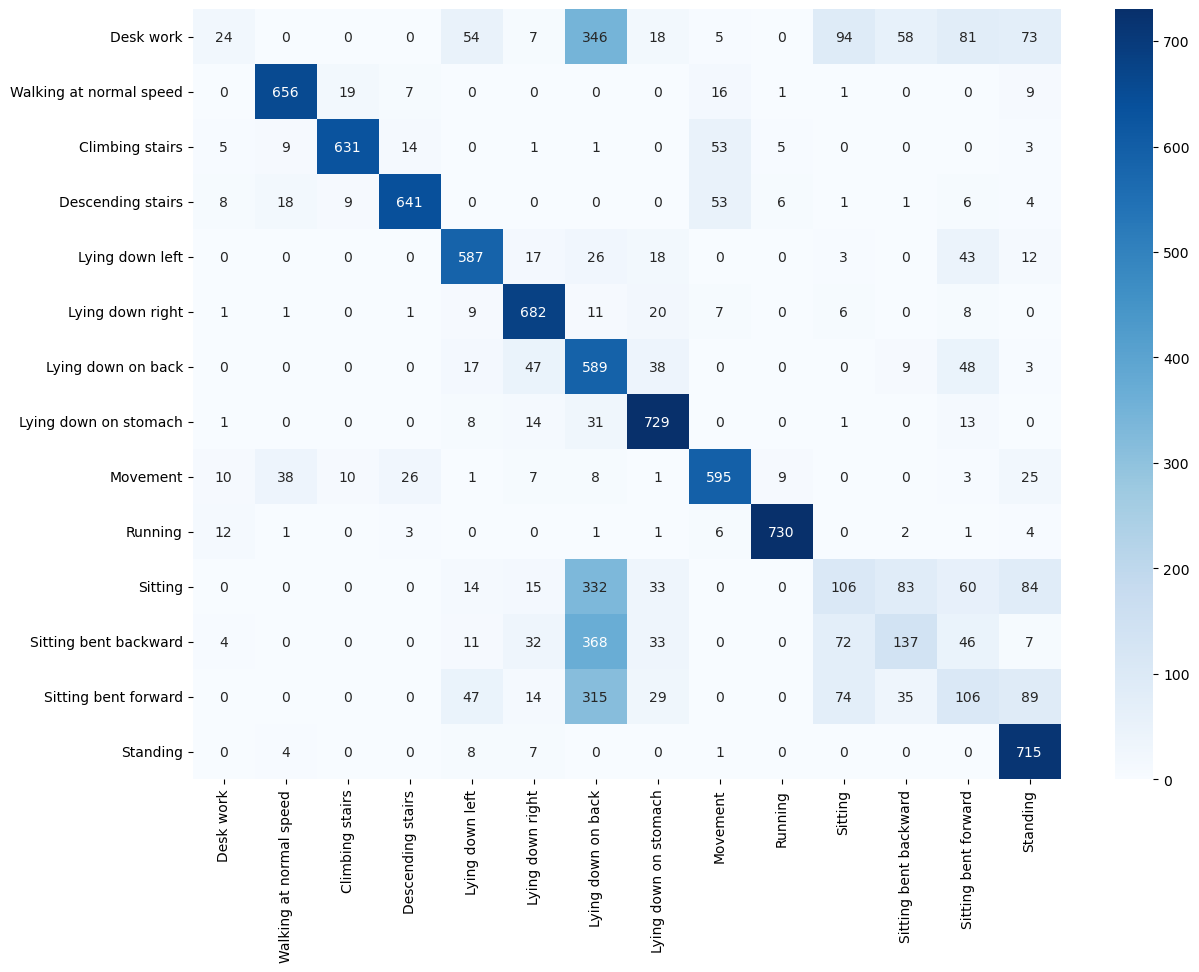

In [119]:
df_cm = pd.DataFrame(confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test)),
                     index=class_labels.keys(),
                     columns=class_labels.keys())
plt.figure(figsize = (14,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")

In [131]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_heatmap(cm, classes):
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    fig = plt.figure(figsize = (14,10))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues", figure=fig)
    return fig

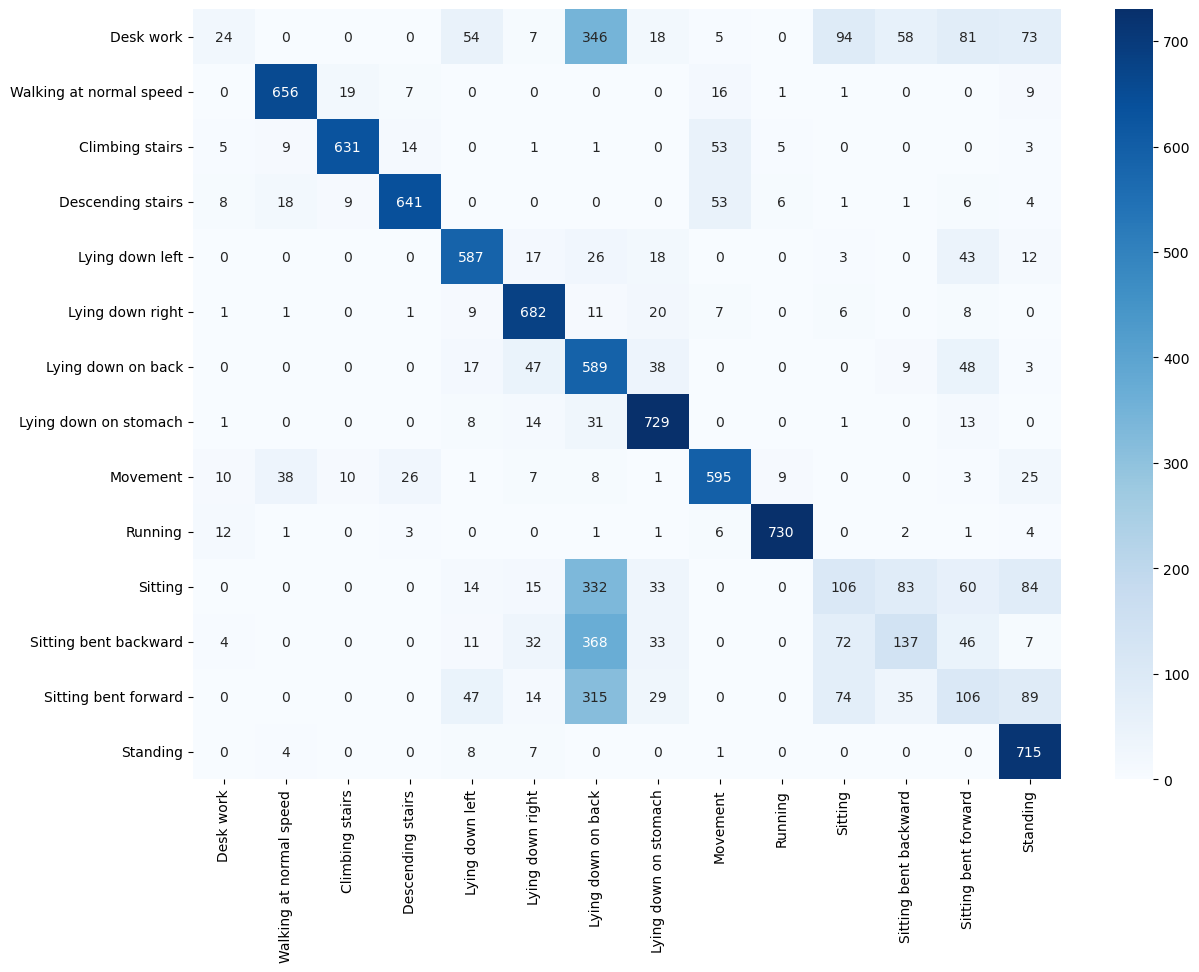

In [132]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_modelv0_thingy2021_2022.tflite")
interpreter.allocate_tensors()
cm = confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test))

x = plot_heatmap(cm, class_labels.keys())

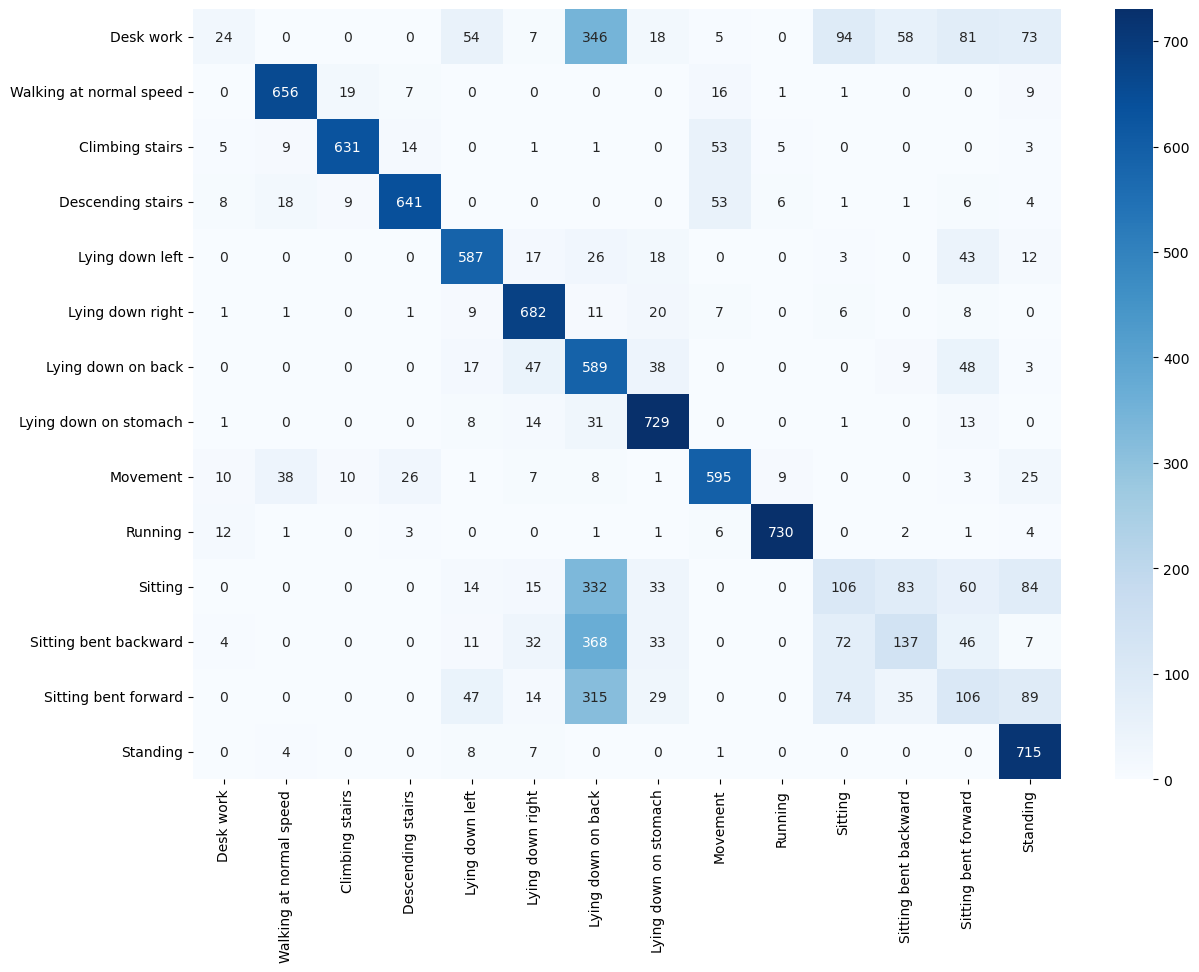

In [133]:
x